# Gaussian Smearing, Mirrored

In [15]:
import sys
sys.path.insert(0, '../../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm
from math import ceil
from matplotlib.colors import LinearSegmentedColormap

from loss_functions import *
from optimization import *
from quantum_channel import *
from kraus_channels import *
from quantum_tools import *
from kraus_channels import *
from experimental import *
from spam import *
from scipy.stats import gaussian_kde
from quantum_circuits import *
from analysis import *
from utils import *


#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
path1 = 'data/'

def resample_diluted(diluted_channel, U = None, num_samples = None):
    d = diluted_channel.d
    c = diluted_channel.c
    rank = diluted_channel.rank
    if U is None:
        U = diluted_channel.U[0,0]
    
    n = int(np.log2(d))
    spectrum_resample_list = []
    for i in tqdm(range(num_samples)):
            
        diluted_resample = DilutedKrausMap(U=U, c=c, kraus_part=KrausMap(d, rank = rank))
        spectrum_resample = channel_spectrum(diluted_resample, use_coords=True, keep_real=False)
        spectrum_resample_list.append(spectrum_resample)
    
    spectrum_resample = np.real(np.concatenate(spectrum_resample_list))
    
    return spectrum_resample

## Nairobi Integrable

### Shallow

In [3]:
model = loader(path1 + "nairobi_4qubit_integrable_shallow.model")
model_diluted = loader(path1 + "diluted_fitting_integrable_shallow.model")[1]

channel_diluted = model_diluted.channel
U = channel_diluted.U[0,0]
channel_unitary = ChoiMapStatic(U, mode="unitary")

print("p =",1- channel_diluted.c.numpy())
print("rank= ",channel_diluted.kraus_part.rank)

p = 0.15842730852655695
rank=  1


In [10]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
rng = np.random.default_rng(seed=42)

spectrum_resample = resample_diluted(channel_diluted, num_samples = 100)
spectrum_resample = np.real(spectrum_resample)
spectrum_resample = spectrum_resample[spectrum_resample[:,1] <= 0]

  0%|          | 0/100 [00:00<?, ?it/s]

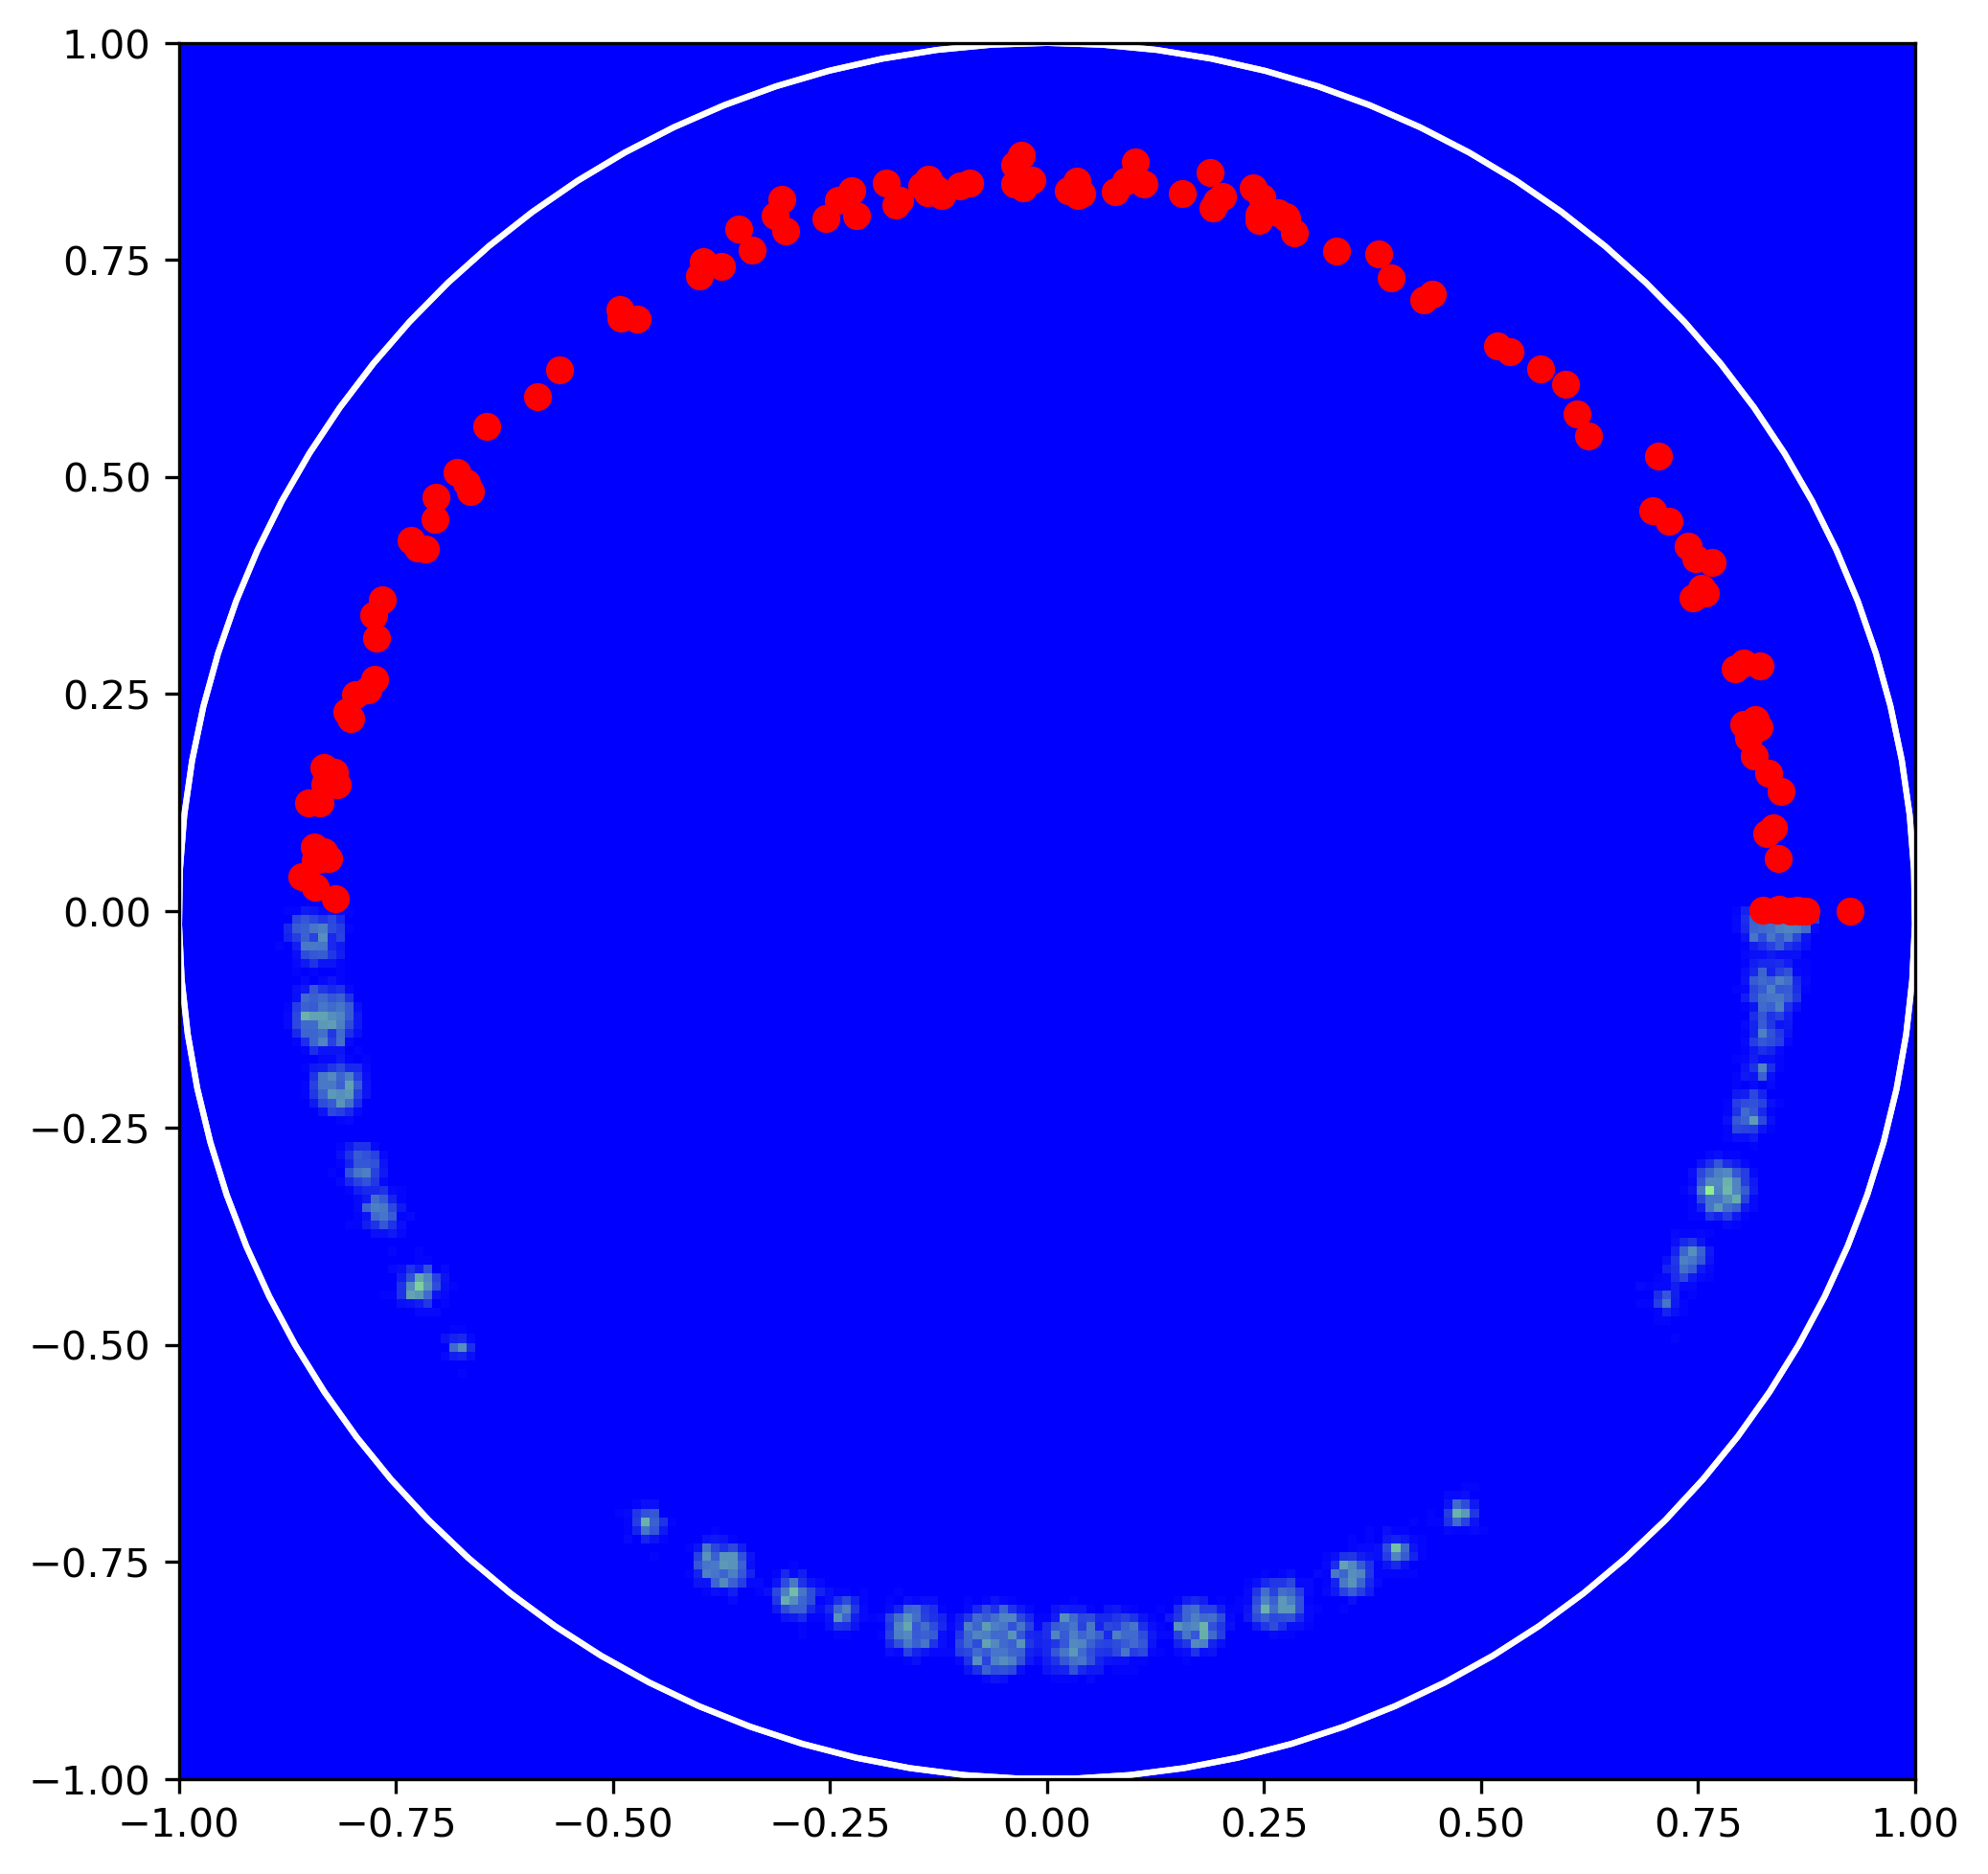

In [17]:
spectrum_model = channel_spectrum(model.channel, use_coords=True, keep_unity=False)
spectrum_model = np.real(spectrum_model.numpy())
spectrum_model = spectrum_model[spectrum_model[:,1] >= 0]
#rho = coat_spectrum(spectrum_model, sigma=0.015, grid_size=200)


t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]

fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)

cmap = LinearSegmentedColormap.from_list('mycmap', [(0, 'blue'), (1, 'lightgreen')])
plt.hist2d(spectrum_resample[:,0], spectrum_resample[:,1], bins = np.linspace(-1, 1, 200), cmap=cmap)
plt.plot(*circle, "w")


plt.plot(spectrum_model[:,0], spectrum_model[:,1], "ro")
plt.plot(*circle, "w")
#plt.savefig("figures/nairobi_4qubit_integrable_shallow_smeared.pdf")
plt.show()

### Medium

In [18]:
model = loader(path1 + "nairobi_4qubit_integrable_medium.model")
model_diluted = loader(path1 + "diluted_fitting_integrable_medium.model")[1]

channel_diluted = model_diluted.channel
U = channel_diluted.U[0,0]
channel_unitary = ChoiMapStatic(U, mode="unitary")

print("p =",1- channel_diluted.c.numpy())
print("rank= ",channel_diluted.kraus_part.rank)

p = 0.3241040579484067
rank=  4


In [19]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
rng = np.random.default_rng(seed=42)

spectrum_resample = resample_diluted(channel_diluted, num_samples = 100)
spectrum_resample = np.real(spectrum_resample)
spectrum_resample = spectrum_resample[spectrum_resample[:,1] <= 0]

  0%|          | 0/100 [00:00<?, ?it/s]

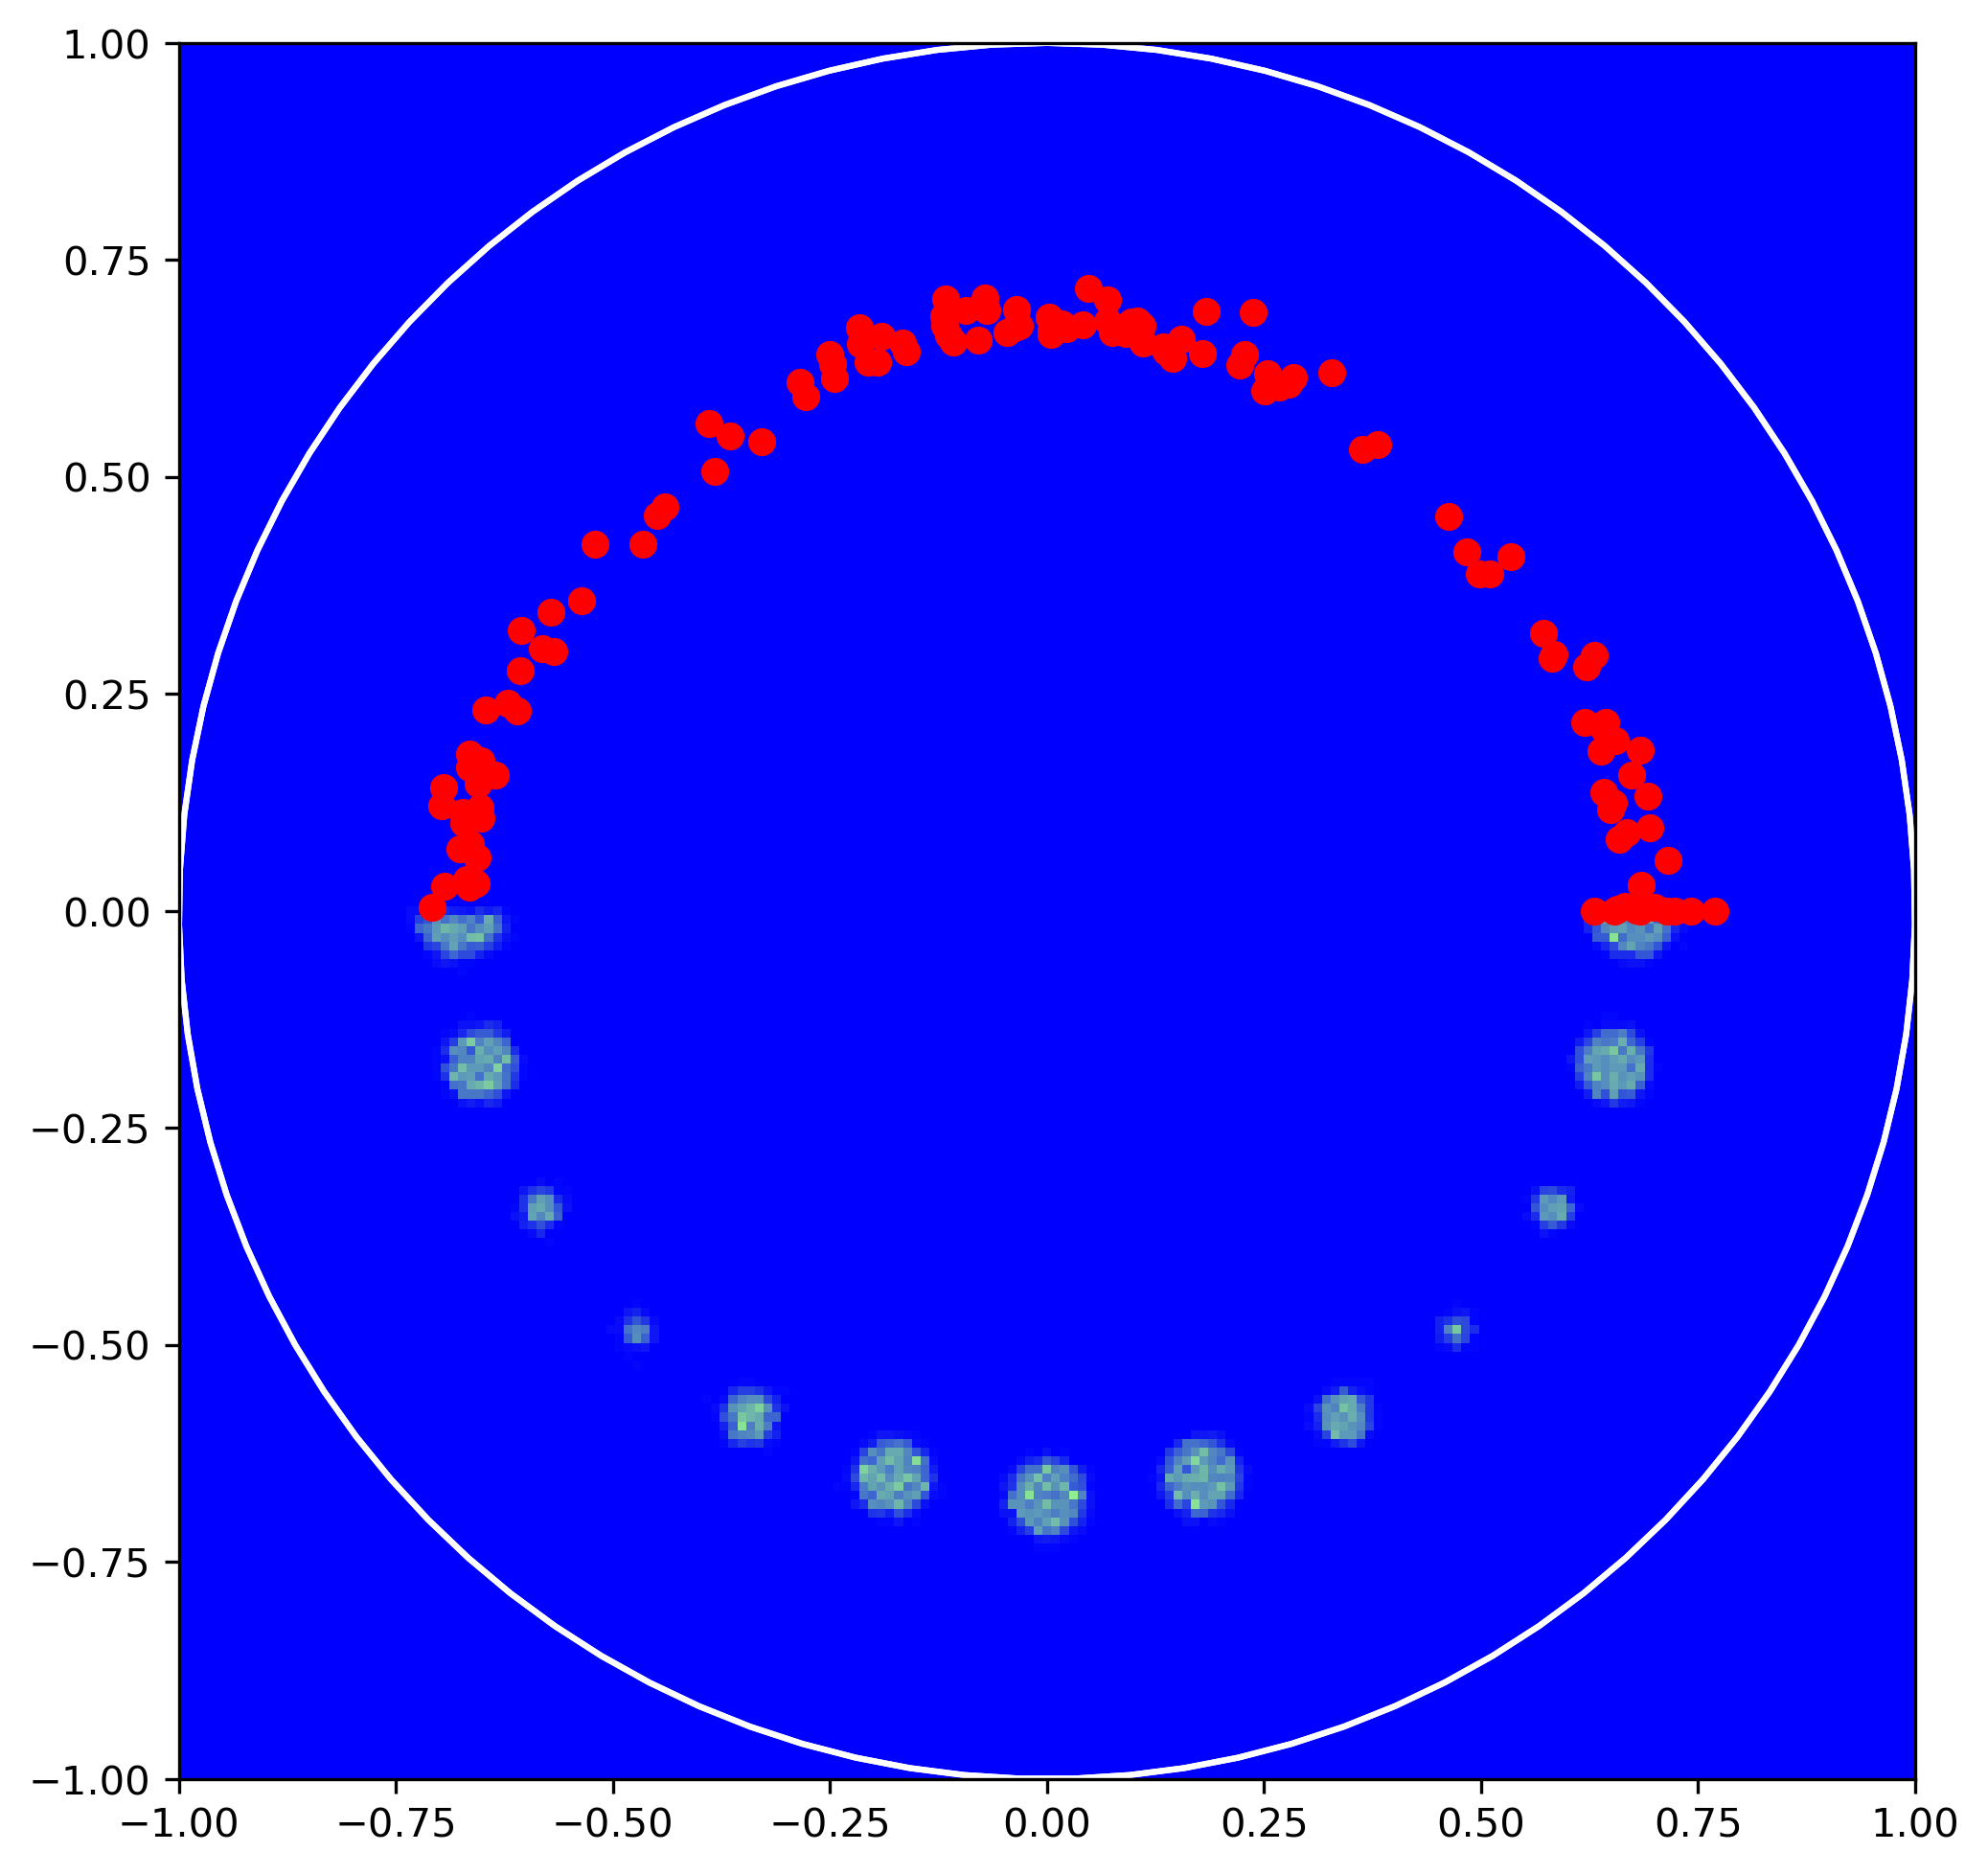

In [20]:
spectrum_model = channel_spectrum(model.channel, use_coords=True, keep_unity=False)
spectrum_model = np.real(spectrum_model.numpy())
spectrum_model = spectrum_model[spectrum_model[:,1] >= 0]
#rho = coat_spectrum(spectrum_model, sigma=0.015, grid_size=200)


t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]

fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)

cmap = LinearSegmentedColormap.from_list('mycmap', [(0, 'blue'), (1, 'lightgreen')])
plt.hist2d(spectrum_resample[:,0], spectrum_resample[:,1], bins = np.linspace(-1, 1, 200), cmap=cmap)
plt.plot(*circle, "w")


plt.plot(spectrum_model[:,0], spectrum_model[:,1], "ro")
plt.plot(*circle, "w")
#plt.savefig("figures/nairobi_4qubit_integrable_shallow_smeared.pdf")
plt.show()

### Deep

In [89]:
model = loader(path1 + "nairobi_4qubit_integrable_deep.model")
model_diluted = loader(path1 + "diluted_fitting_integrable_deep.model")[1]

channel_diluted = model_diluted.channel
U = channel_diluted.U[0,0]
channel_unitary = ChoiMapStatic(U, mode="unitary")

print("p =",1- channel_diluted.c.numpy())
print("rank= ",channel_diluted.kraus_part.rank)

p = 0.5693075909093264
rank=  19


In [90]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
rng = np.random.default_rng(seed=42)

spectrum_resample = resample_diluted(channel_diluted, num_samples = 100)

  0%|          | 0/100 [00:00<?, ?it/s]

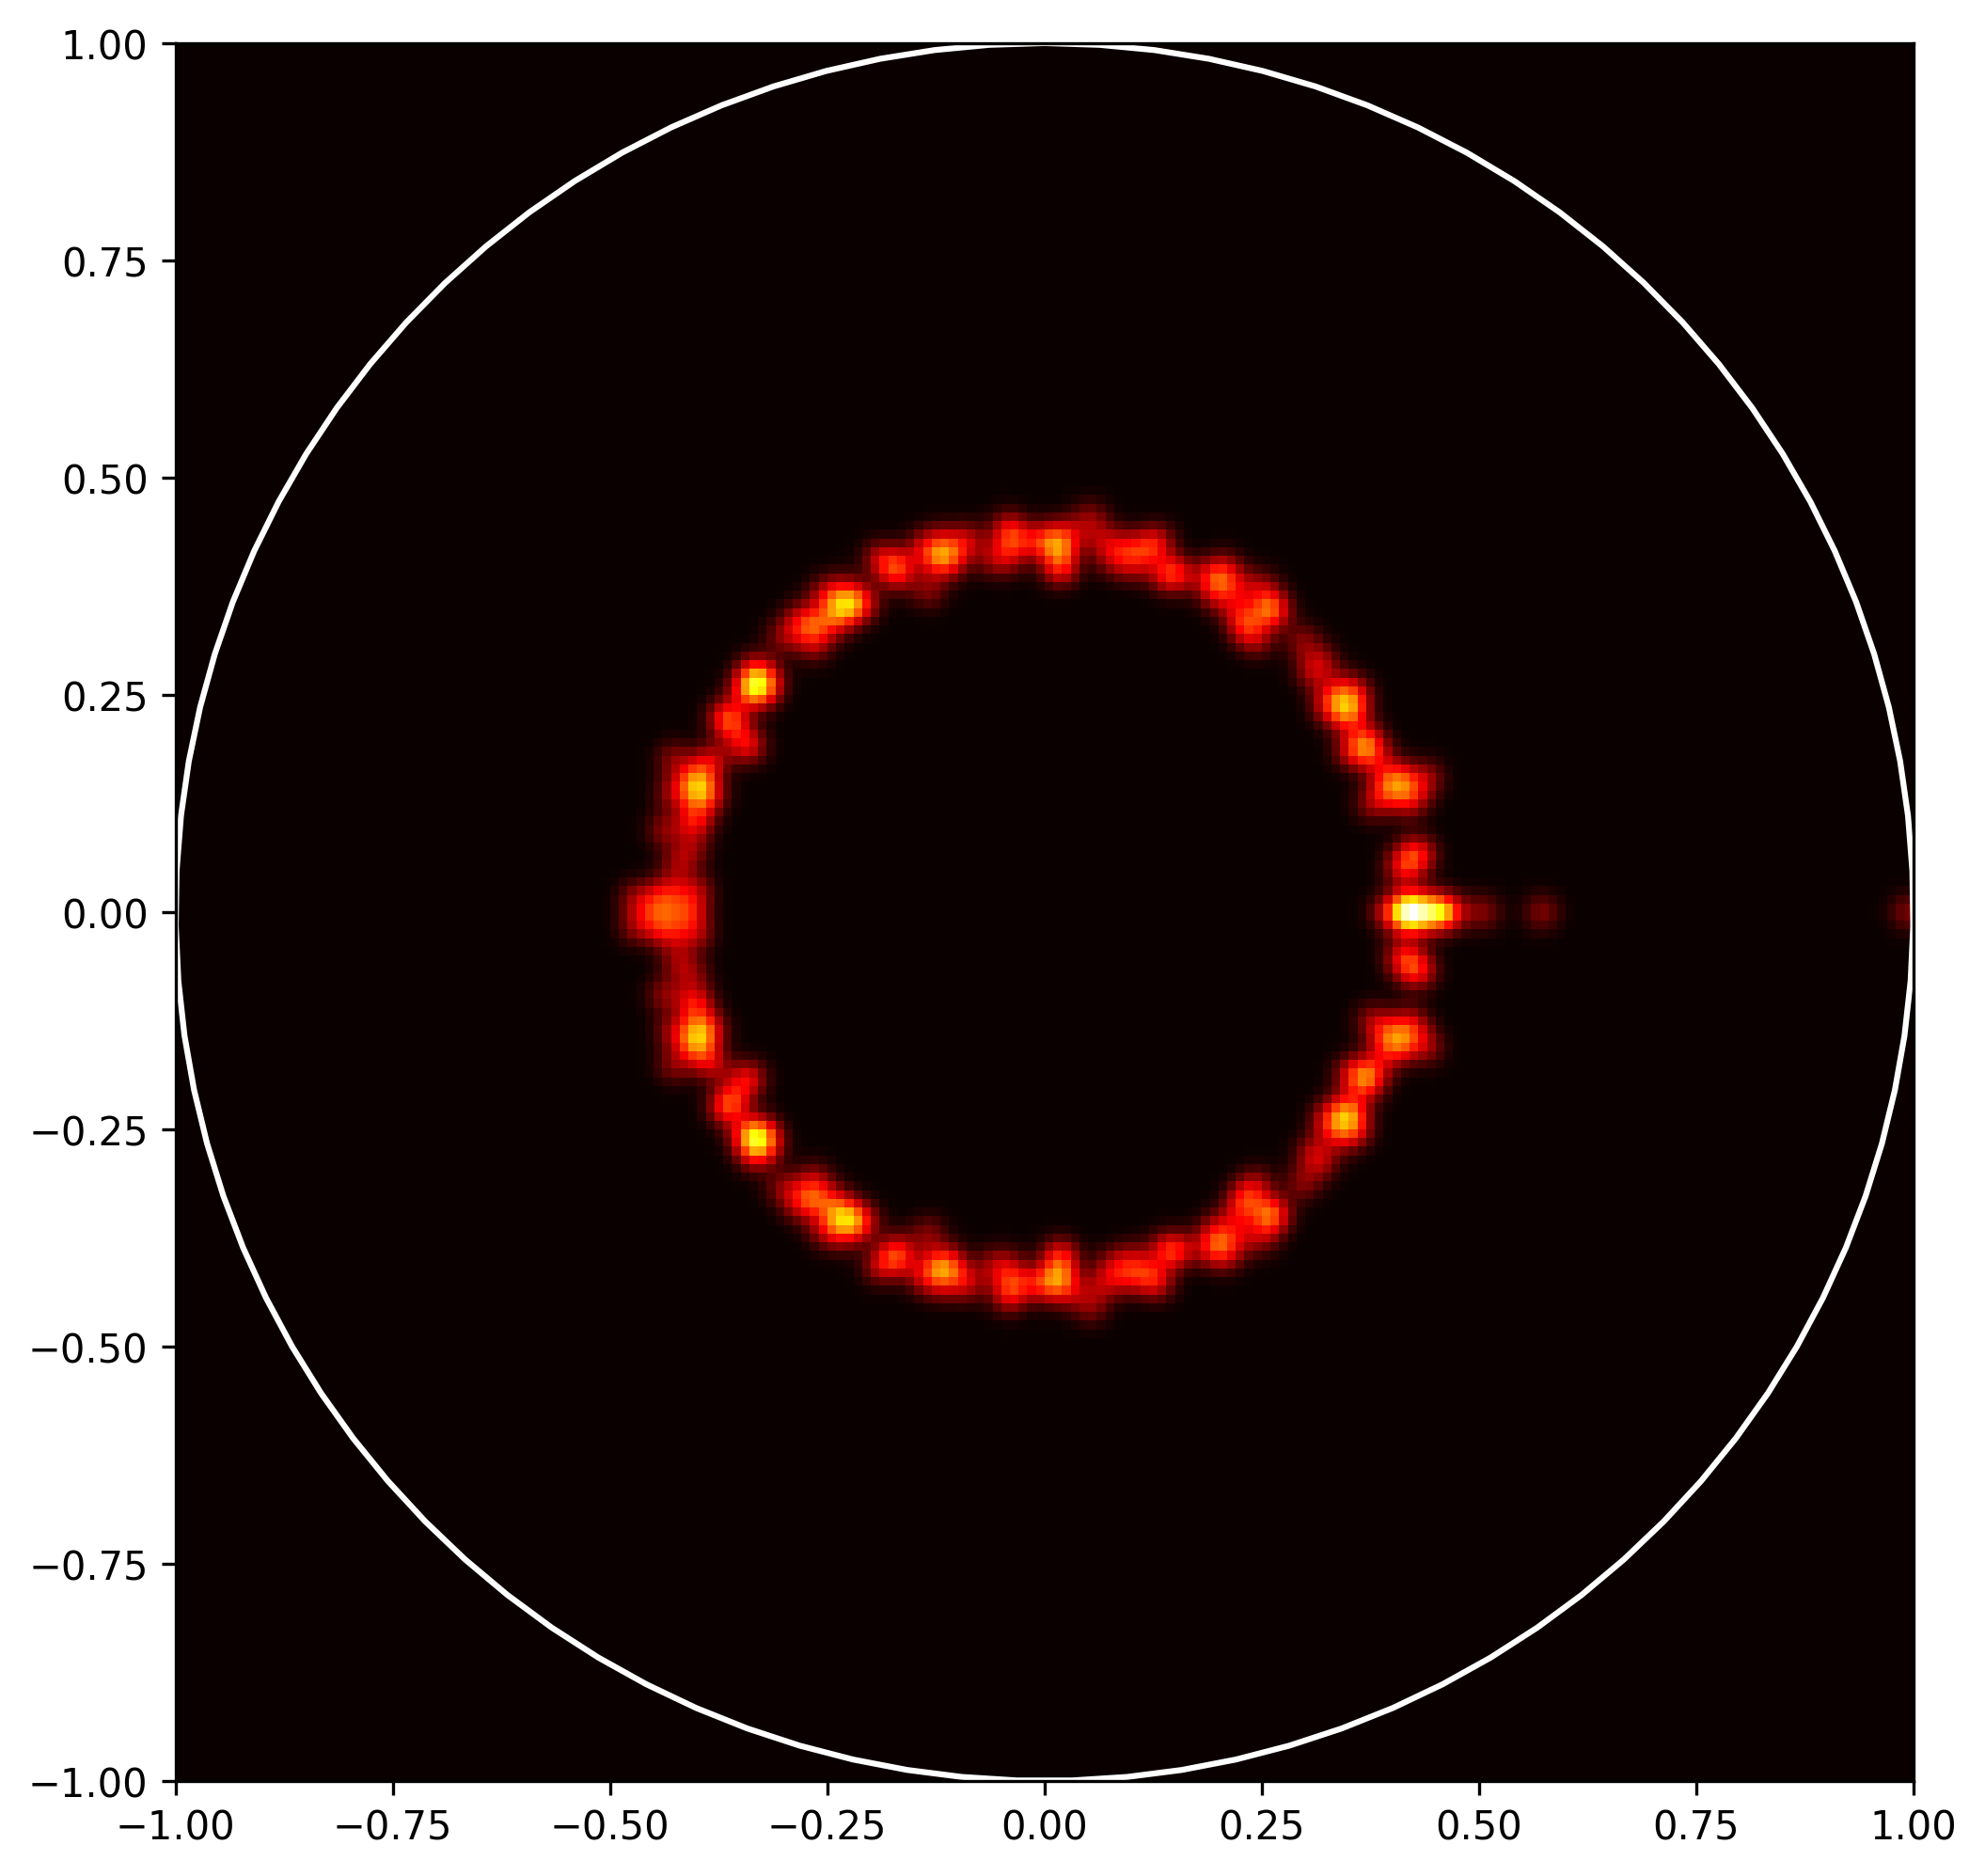

In [91]:
spectrum_model = channel_spectrum(model.channel, use_coords=True)
rho = coat_spectrum(spectrum_model, sigma=0.015, grid_size=200)

t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]

fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)

plt.imshow(rho, extent=[-1, 1, -1, 1], cmap='hot')
plt.plot(*circle, "w")
plt.savefig("figures/nairobi_4qubit_integrable_deep_smeared.pdf")
plt.show()

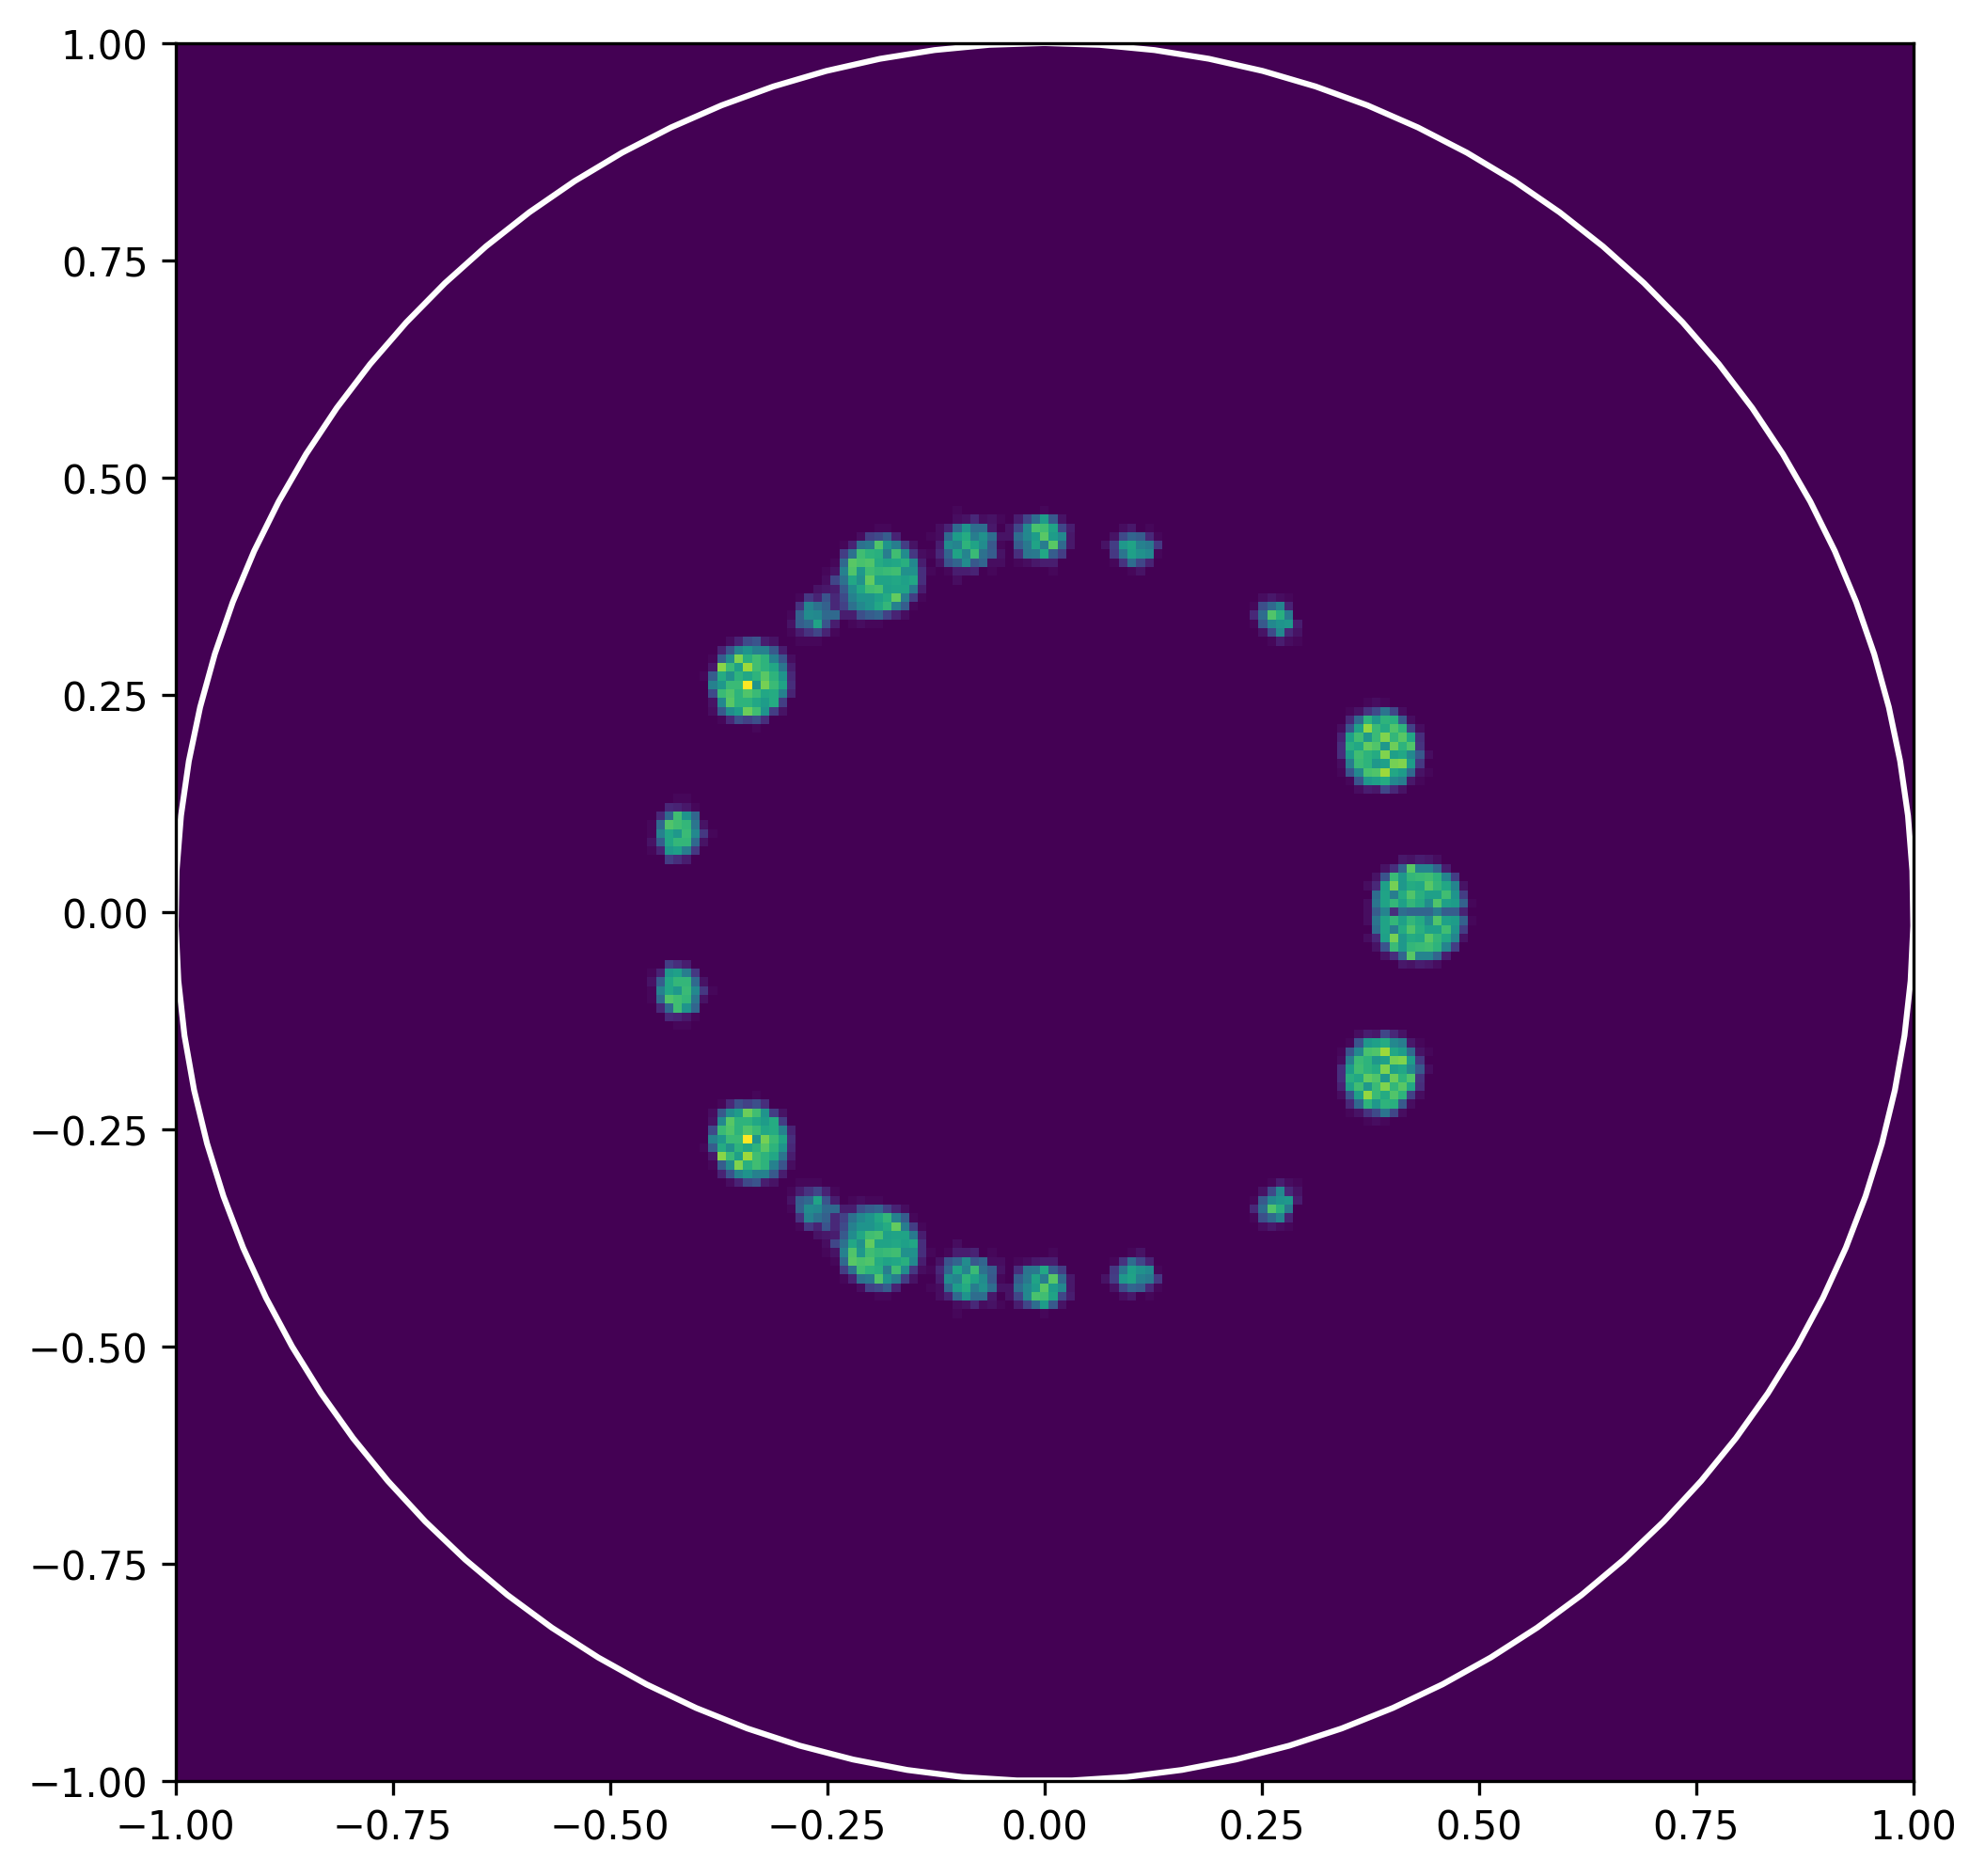

In [92]:
t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]

fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)

h, bins, _, _ = plt.hist2d(spectrum_resample[:,0], spectrum_resample[:,1], bins = np.linspace(-1, 1, 200))
plt.plot(*circle, "w")
plt.savefig("figures/nairobi_4qubit_integrable_deep_diluted.pdf")

plt.show()

## Non-Integrable

### Shallow


In [25]:
model = loader(path1 + "nairobi_4qubit_nonintegrable_shallow.model")
model_diluted = loader(path1 + "diluted_fitting_nonintegrable_shallow.model")[1]

channel_diluted = model_diluted.channel
U = channel_diluted.U[0,0]
channel_unitary = ChoiMapStatic(U, mode="unitary")

print("p =",1- channel_diluted.c.numpy())
print("rank= ",channel_diluted.kraus_part.rank)

p = 0.24638358328217247
rank=  5


In [26]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
rng = np.random.default_rng(seed=42)

spectrum_resample = resample_diluted(channel_diluted, num_samples = 100)

  0%|          | 0/100 [00:00<?, ?it/s]

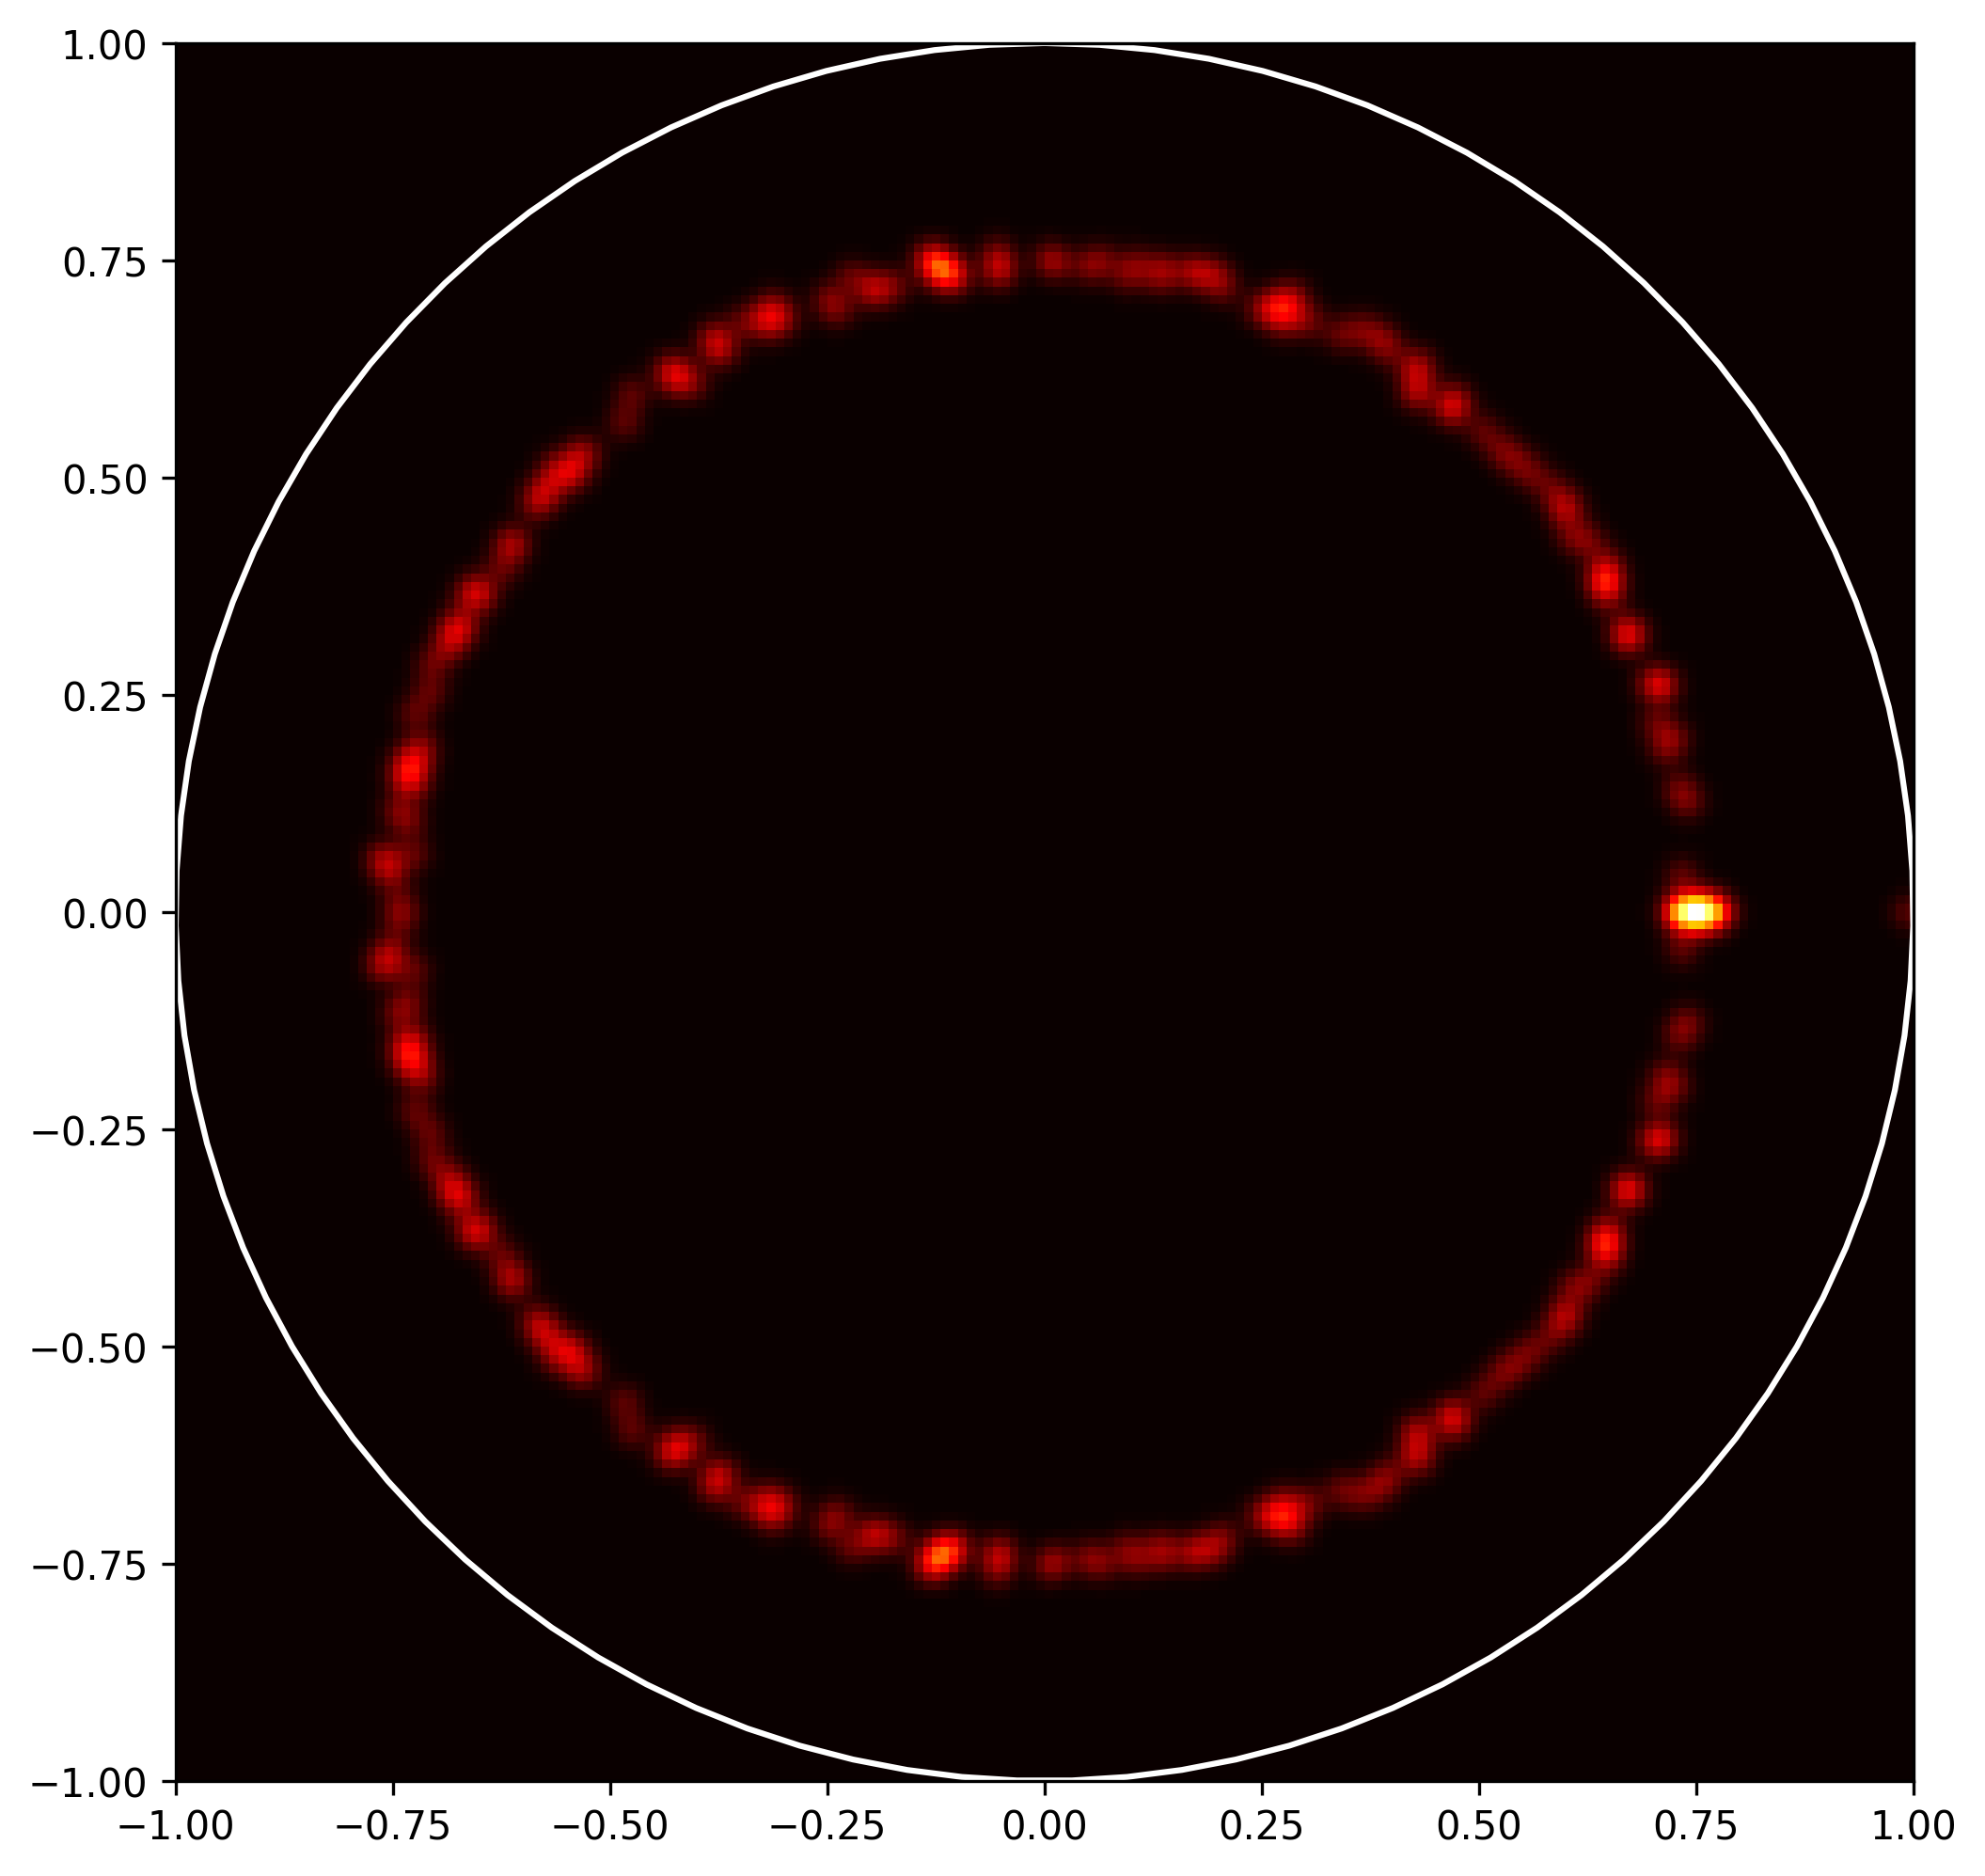

In [27]:
spectrum_model = channel_spectrum(model.channel, use_coords=True)
rho = coat_spectrum(spectrum_model, sigma=0.015, grid_size=200)

t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]

fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)

plt.imshow(rho, extent=[-1, 1, -1, 1], cmap='hot')
plt.plot(*circle, "w")
plt.savefig("figures/nairobi_4qubit_nonintegrable_deep_smeared.pdf")
plt.show()

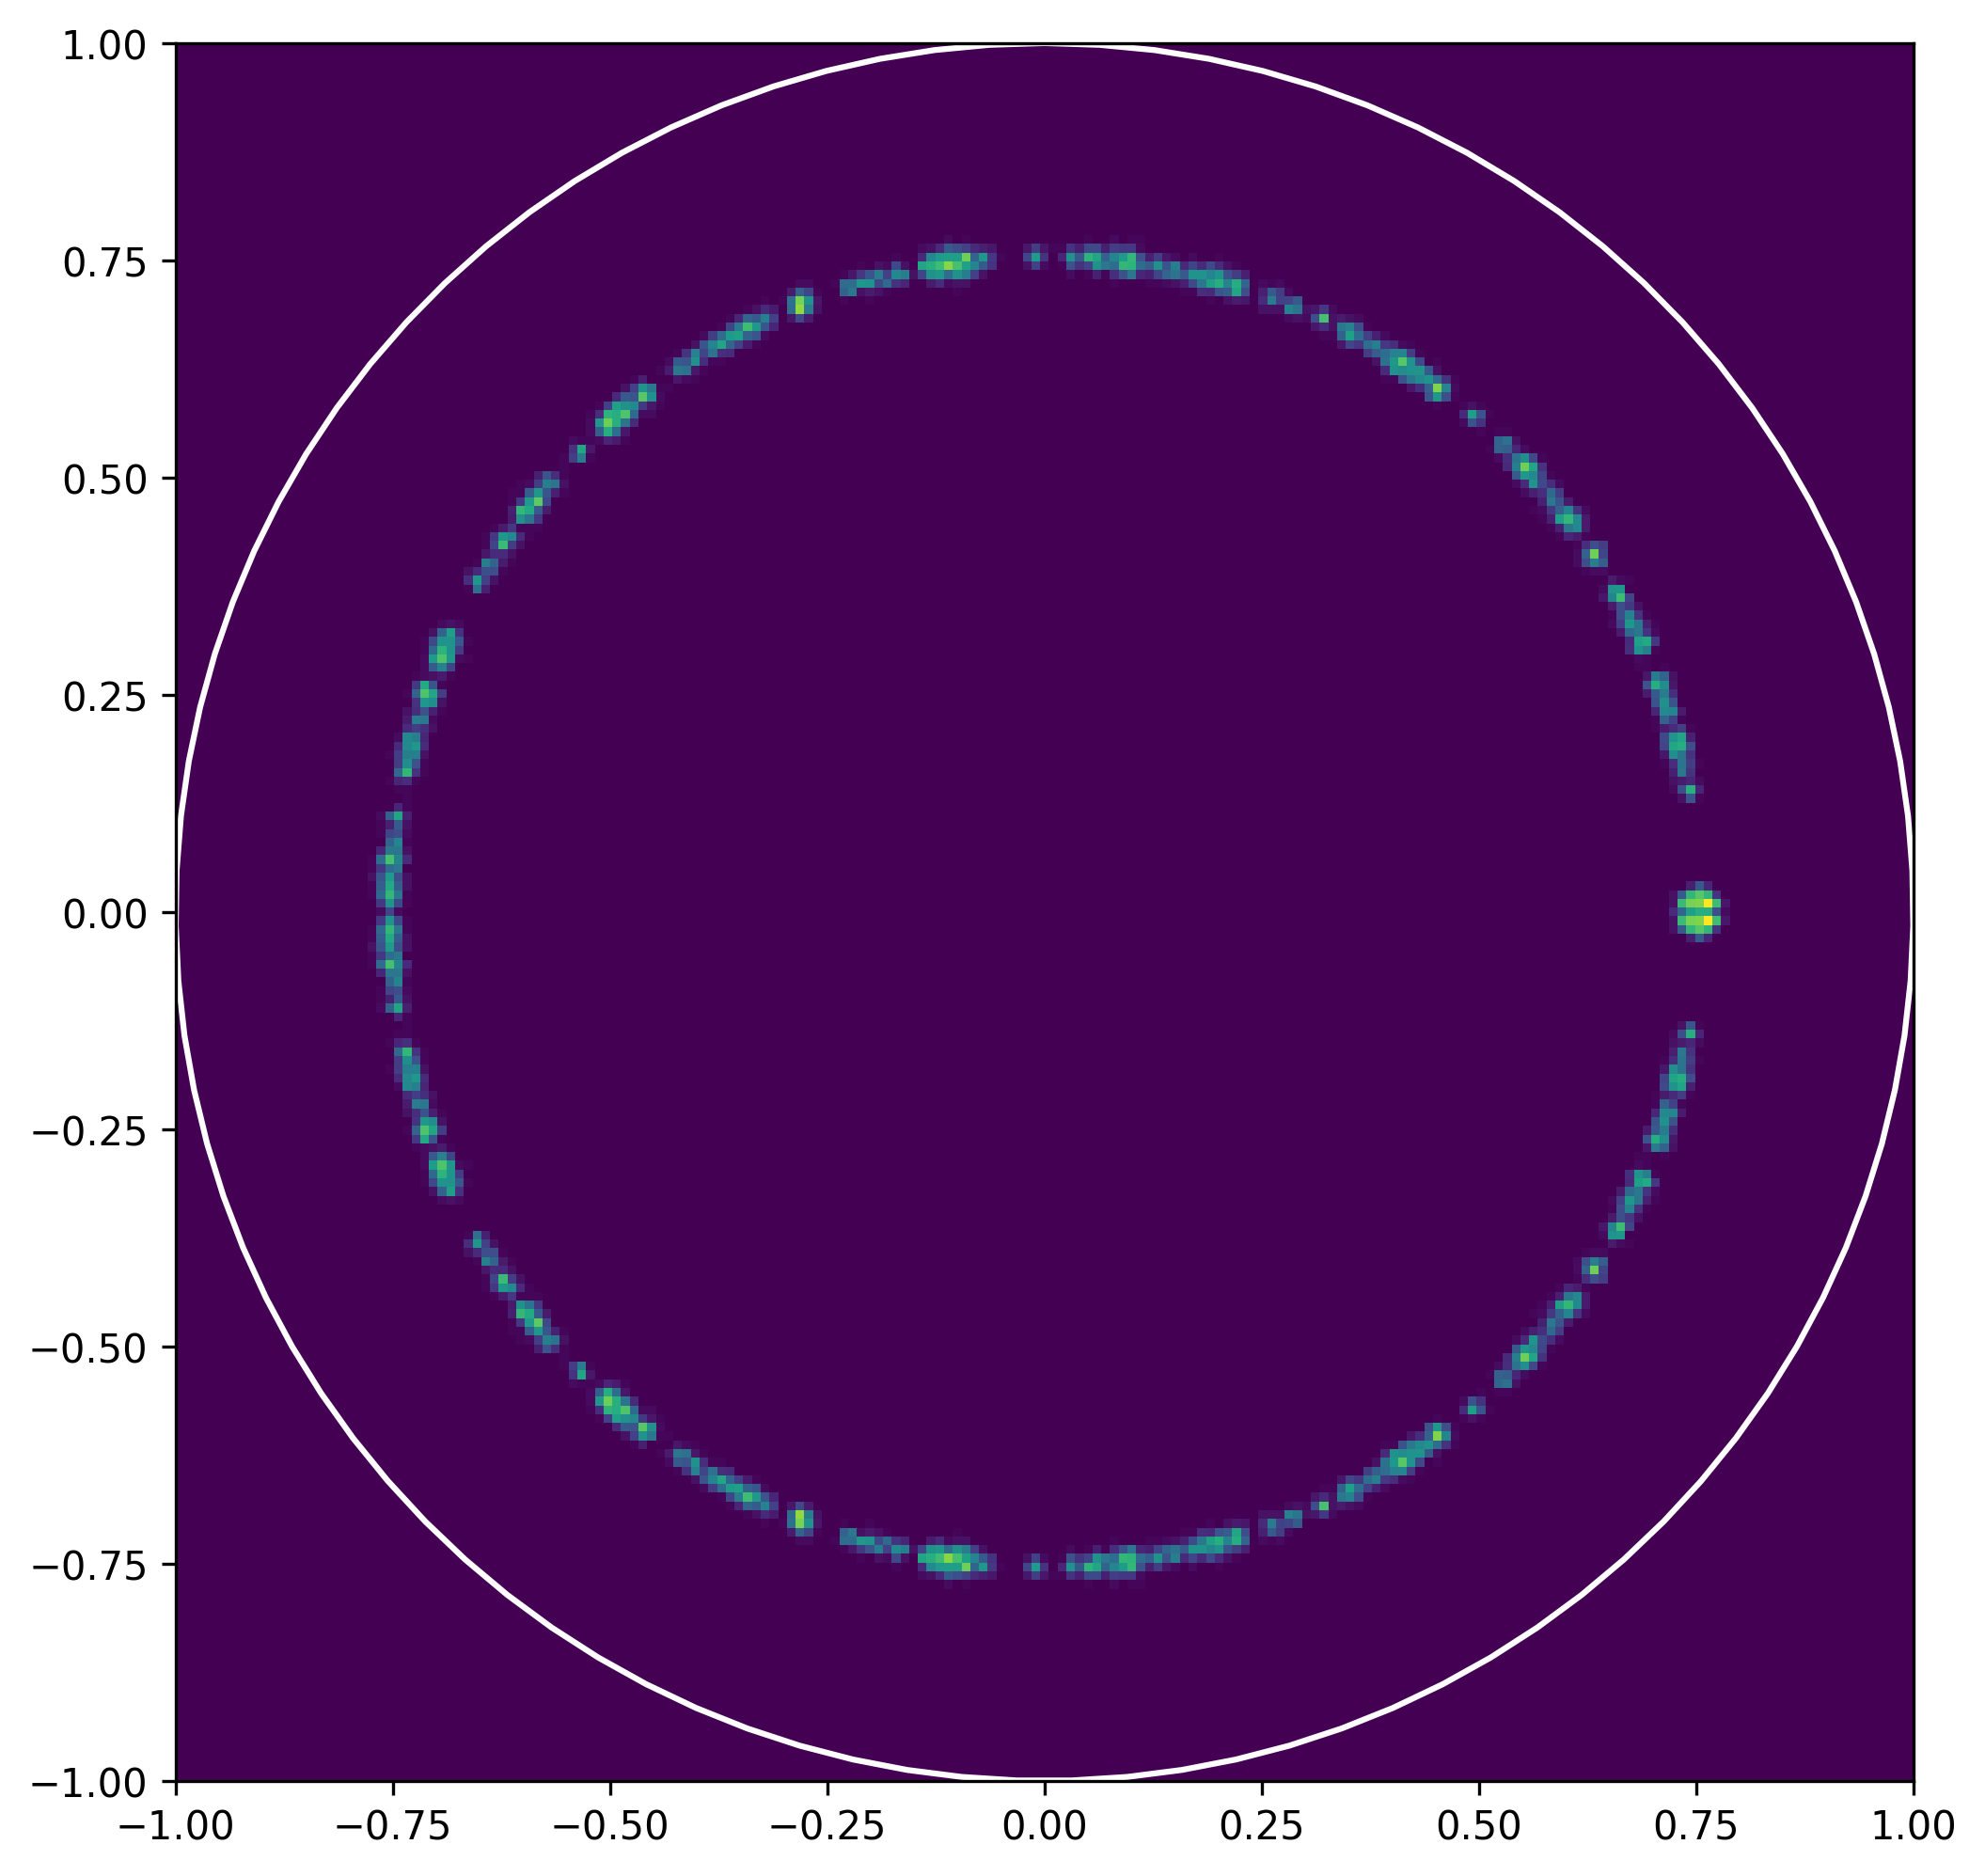

In [28]:
t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]

fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)

h, bins, _, _ = plt.hist2d(spectrum_resample[:,0], spectrum_resample[:,1], bins = np.linspace(-1, 1, 200))
plt.plot(*circle, "w")
plt.savefig("figures/nairobi_4qubit_nonintegrable_shallow_diluted.pdf")

plt.show()

### Medium

In [29]:
model = loader(path1 + "nairobi_4qubit_nonintegrable_medium.model")
model_diluted = loader(path1 + "diluted_fitting_nonintegrable_medium.model")[1]

channel_diluted = model_diluted.channel
U = channel_diluted.U[0,0]
channel_unitary = ChoiMapStatic(U, mode="unitary")

print("p =",1- channel_diluted.c.numpy())
print("rank= ",channel_diluted.kraus_part.rank)

p = 0.36035090327305686
rank=  16


In [30]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
rng = np.random.default_rng(seed=42)

spectrum_resample = resample_diluted(channel_diluted, num_samples = 100)

  0%|          | 0/100 [00:00<?, ?it/s]

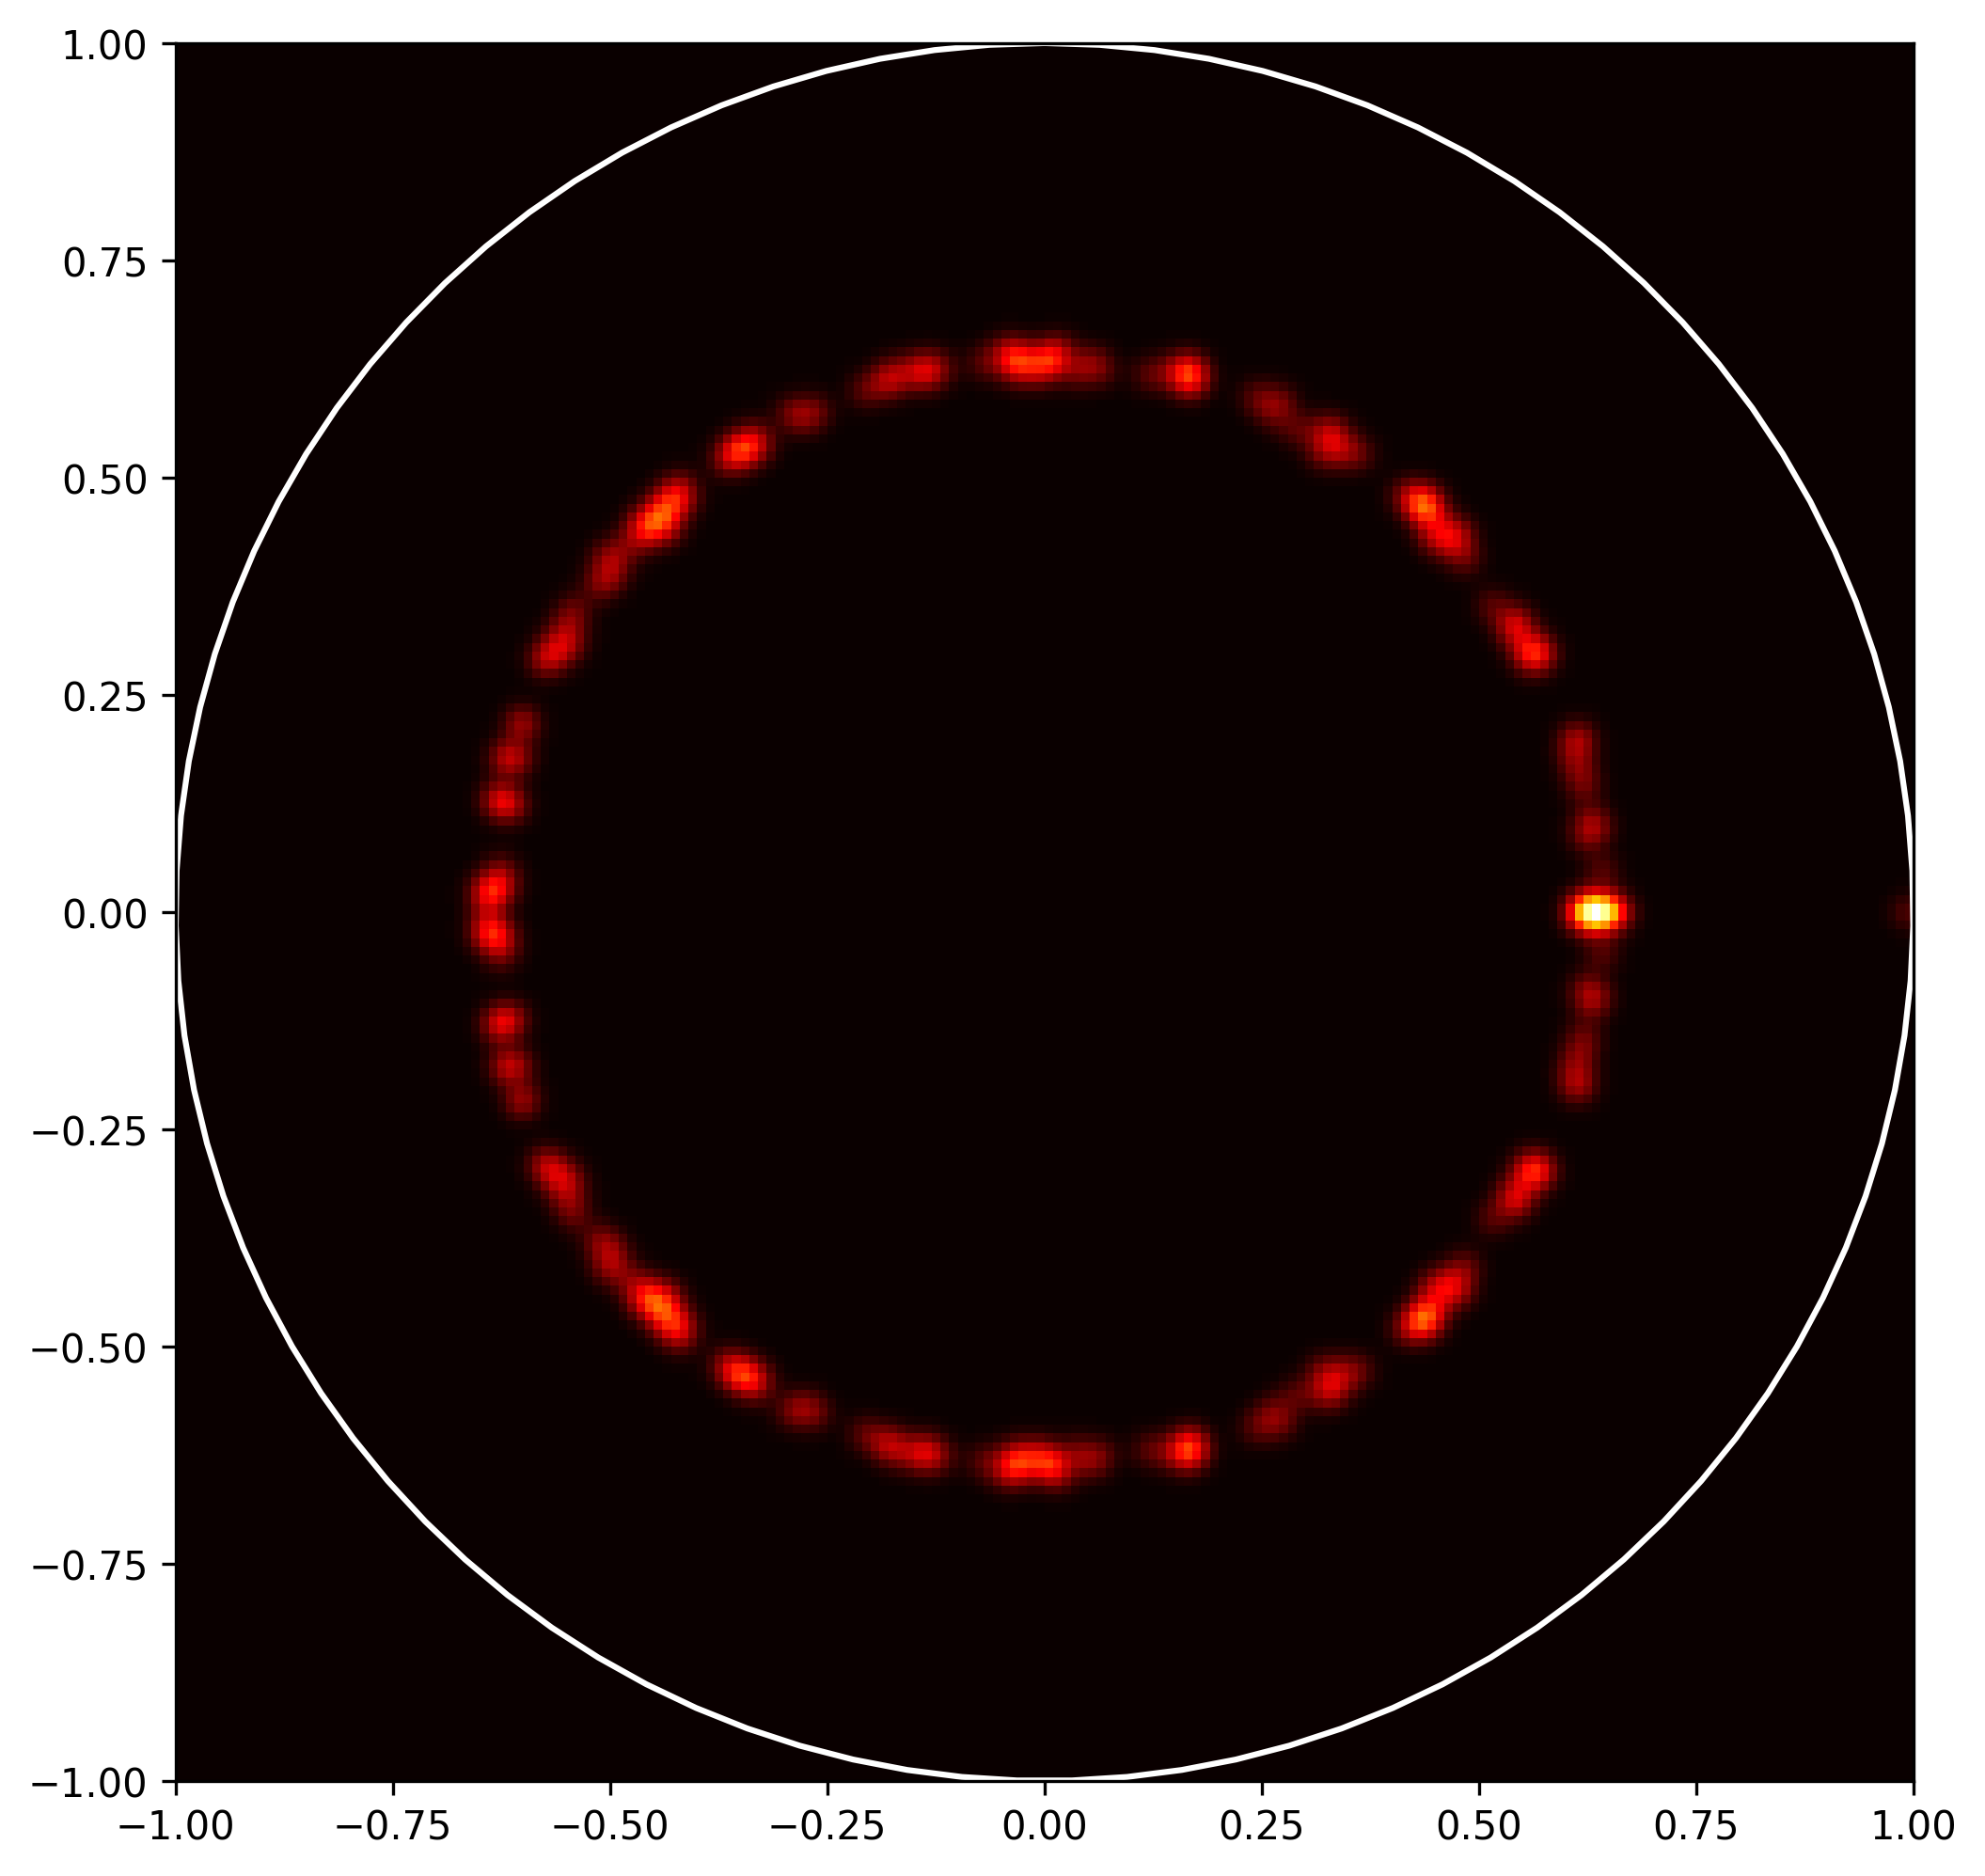

In [31]:
spectrum_model = channel_spectrum(model.channel, use_coords=True)
rho = coat_spectrum(spectrum_model, sigma=0.015, grid_size=200)

t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]

fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)

plt.imshow(rho, extent=[-1, 1, -1, 1], cmap='hot')
plt.plot(*circle, "w")
plt.savefig("figures/nairobi_4qubit_nonintegrable_medium_smeared.pdf")
plt.show()

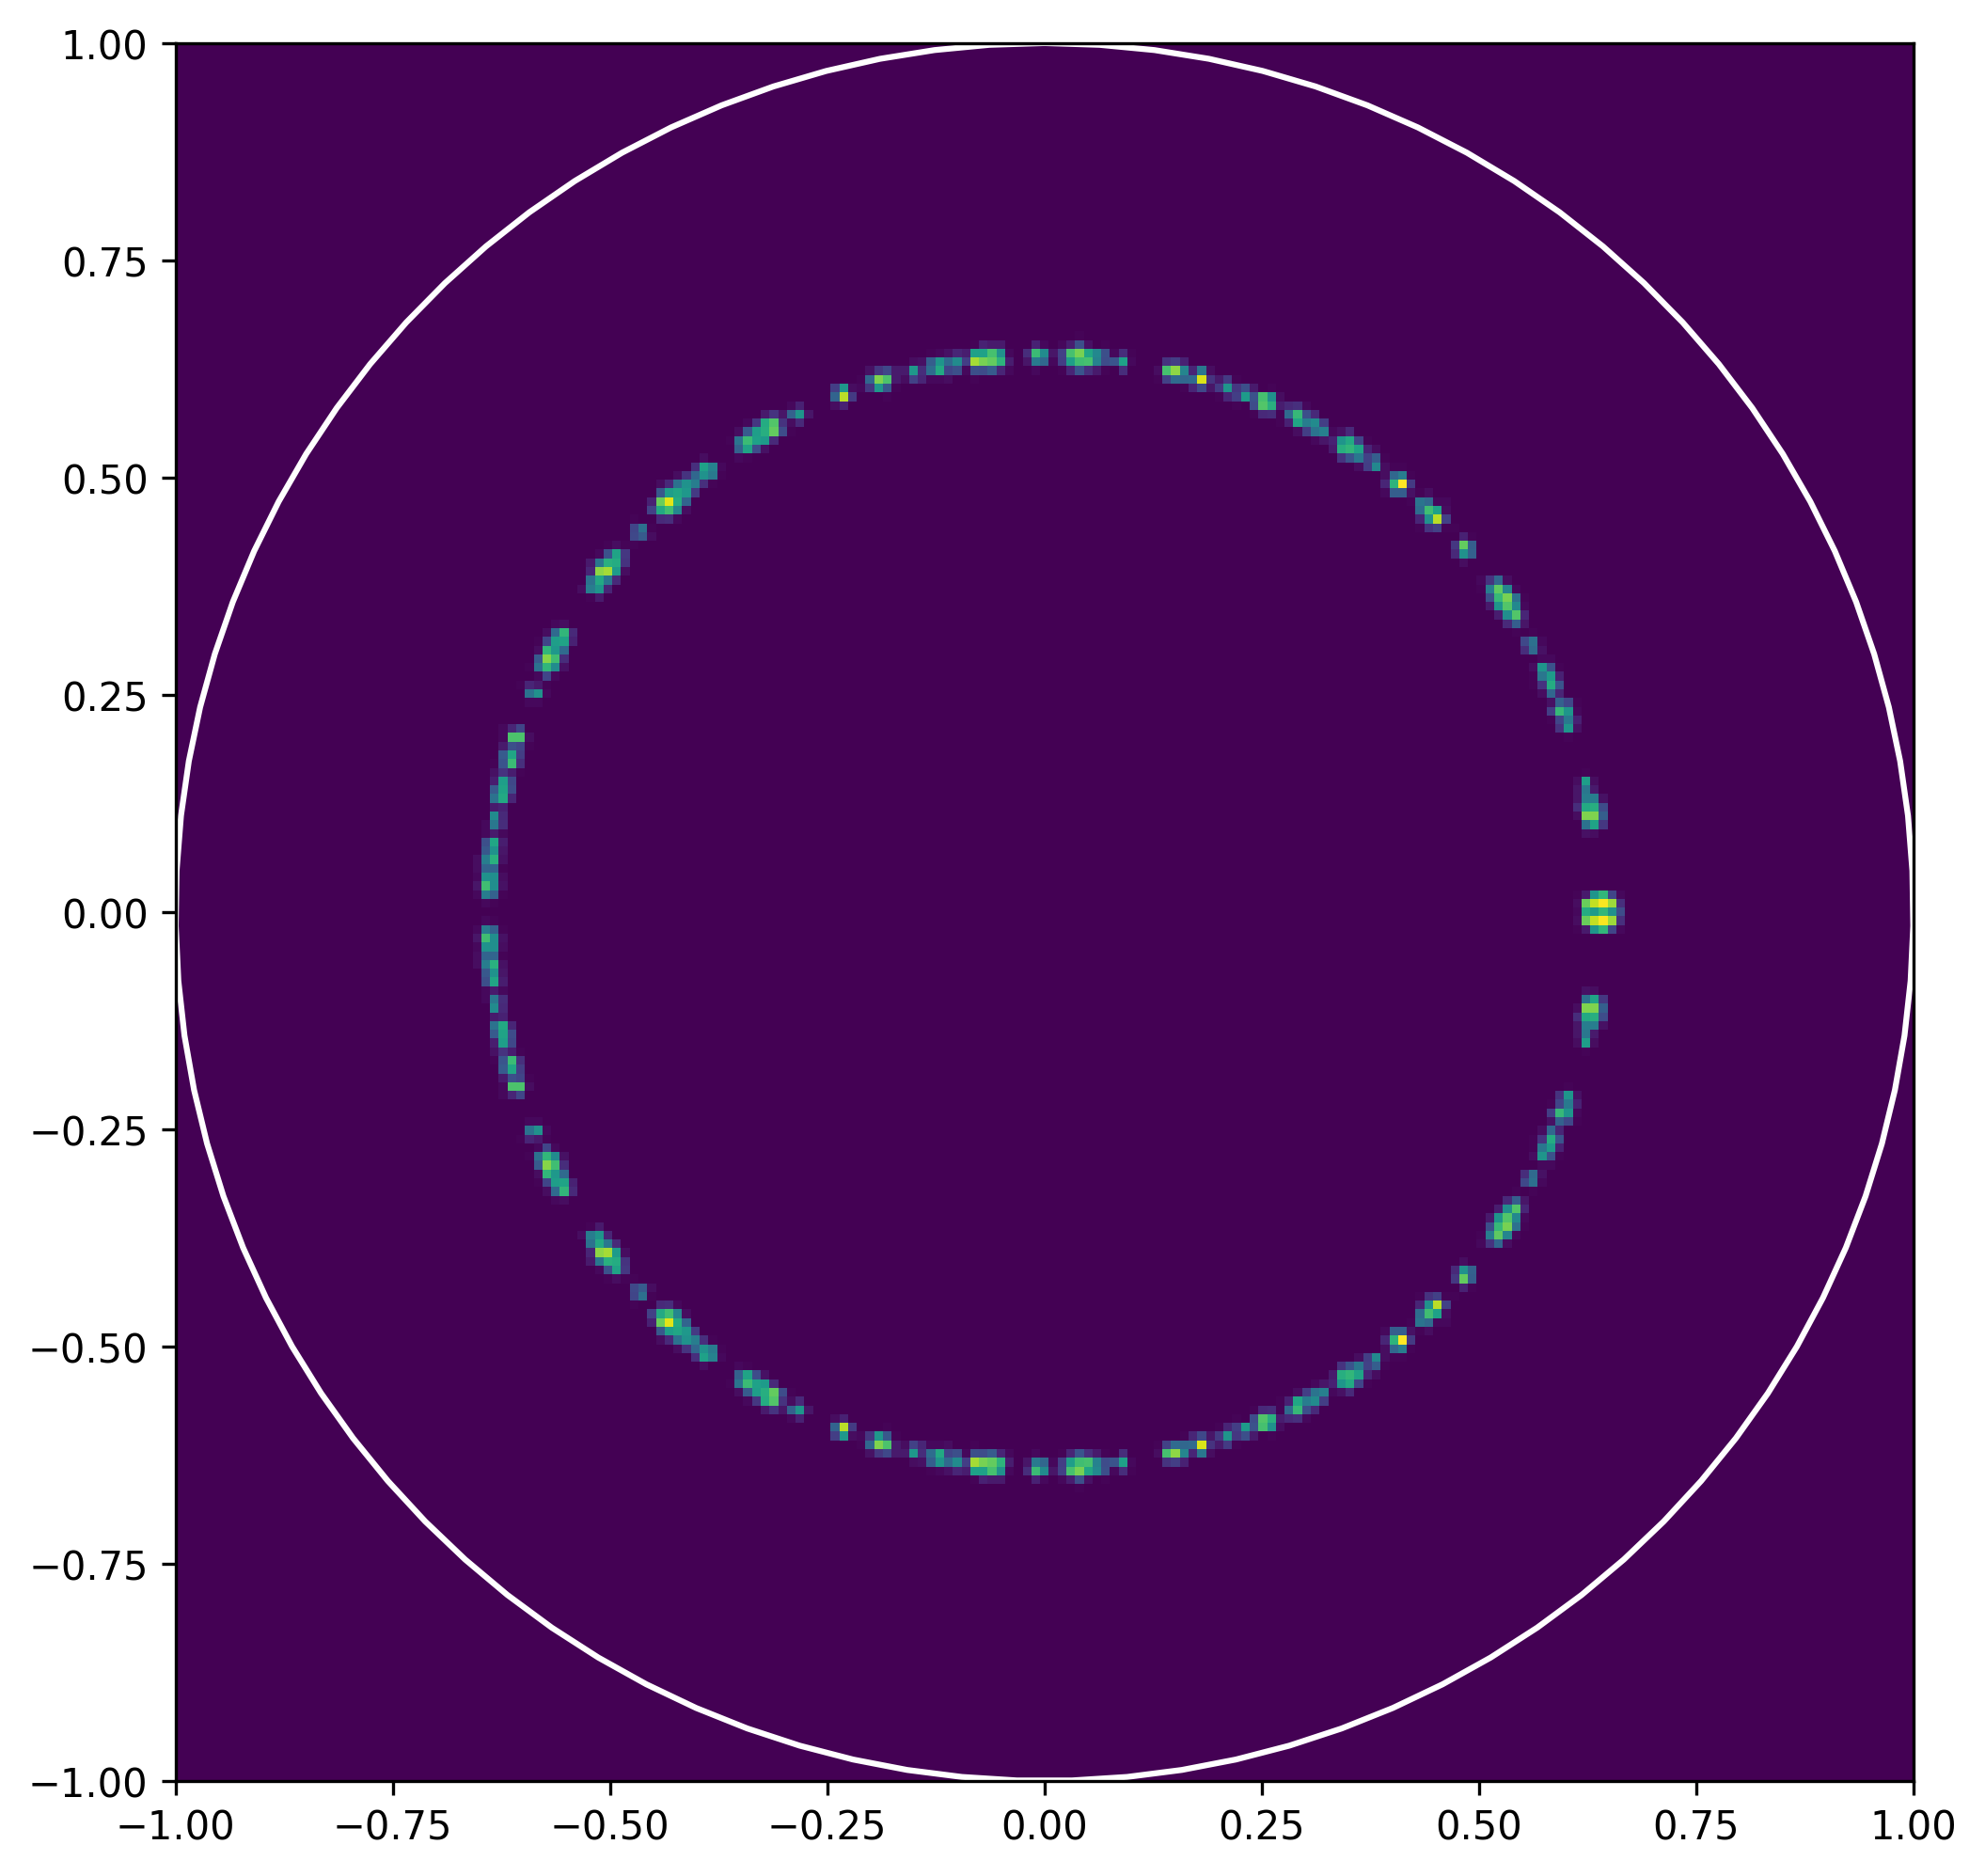

In [32]:
t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]

fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)

h, bins, _, _ = plt.hist2d(spectrum_resample[:,0], spectrum_resample[:,1], bins = np.linspace(-1, 1, 200))
plt.plot(*circle, "w")
plt.savefig("figures/nairobi_4qubit_nonintegrable_medium_diluted.pdf")

plt.show()

### Deep

In [33]:
model = loader(path1 + "nairobi_4qubit_nonintegrable_deep.model")
model_diluted = loader(path1 + "diluted_fitting_nonintegrable_deep.model")[1]

channel_diluted = model_diluted.channel
U = channel_diluted.U[0,0]
channel_unitary = ChoiMapStatic(U, mode="unitary")

print("p =",1- channel_diluted.c.numpy())
print("rank = ",channel_diluted.kraus_part.rank)

p = 0.5388349178990948
rank=  25


In [34]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
rng = np.random.default_rng(seed=42)

spectrum_resample = resample_diluted(channel_diluted, num_samples = 100)

  0%|          | 0/100 [00:00<?, ?it/s]

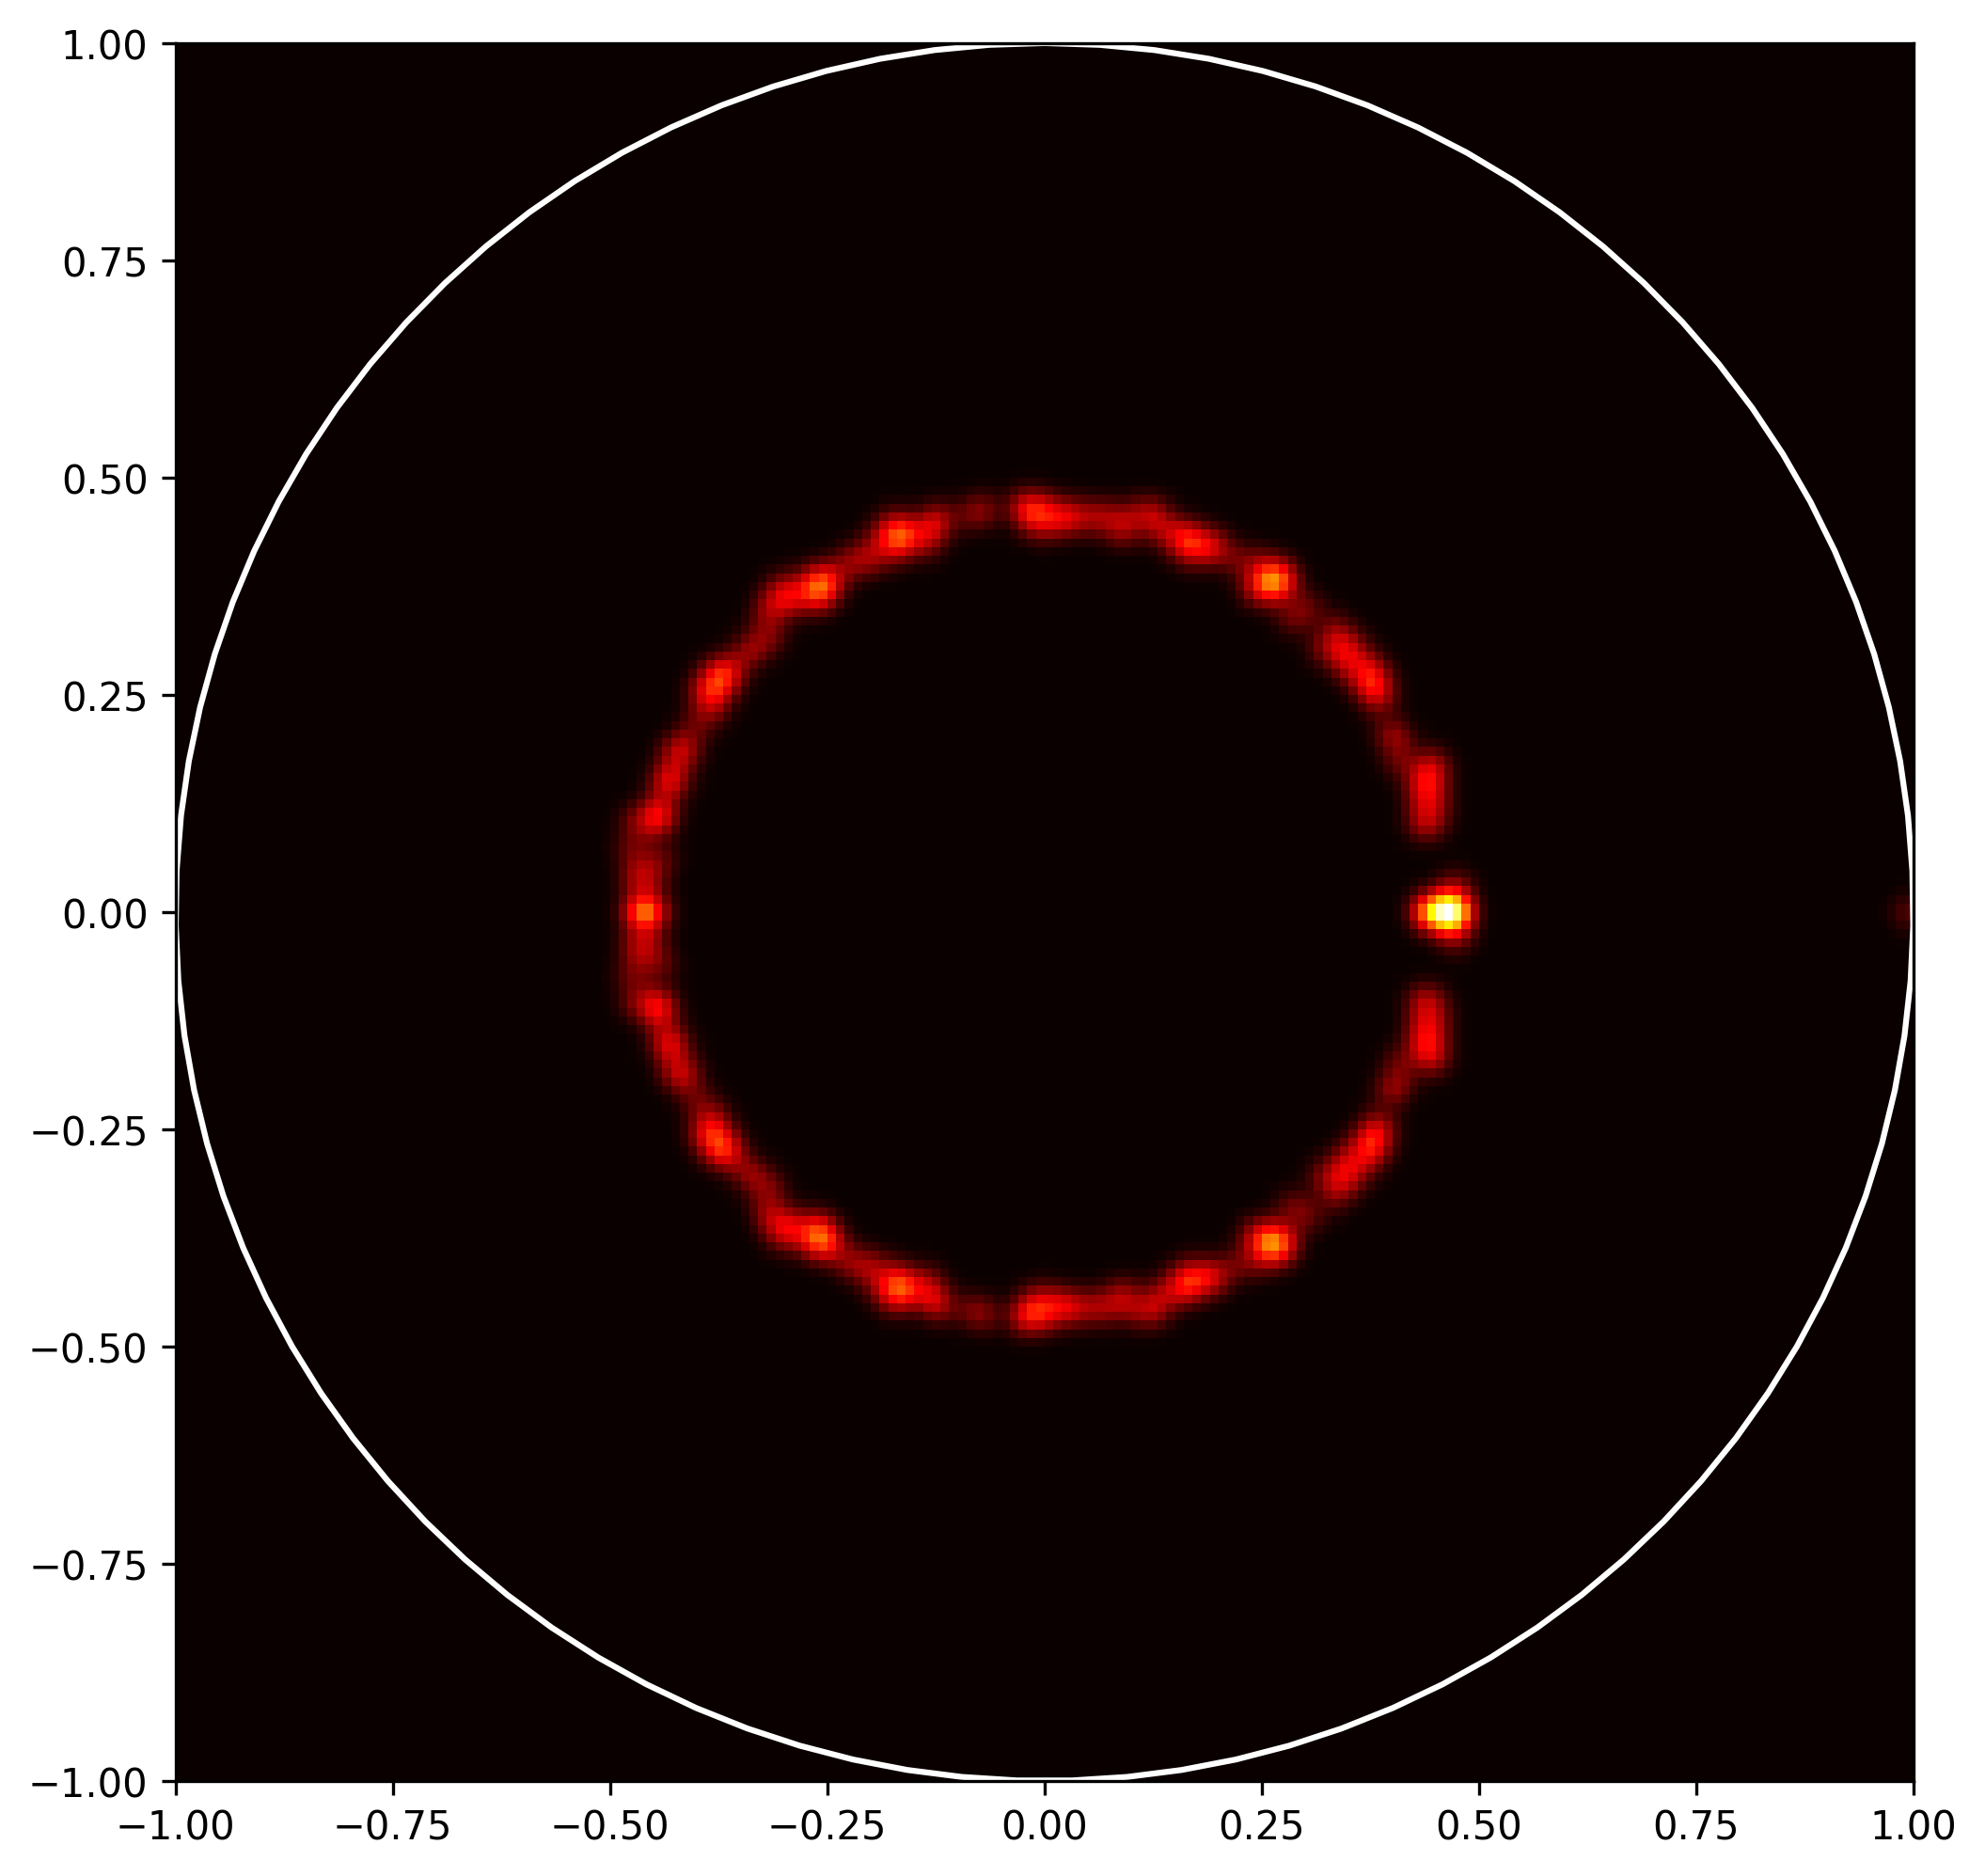

In [35]:
spectrum_model = channel_spectrum(model.channel, use_coords=True)
rho = coat_spectrum(spectrum_model, sigma=0.015, grid_size=200)

t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]

fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)

plt.imshow(rho, extent=[-1, 1, -1, 1], cmap='hot')
plt.plot(*circle, "w")
plt.savefig("figures/nairobi_4qubit_nonintegrable_deep_smeared.pdf")
plt.show()

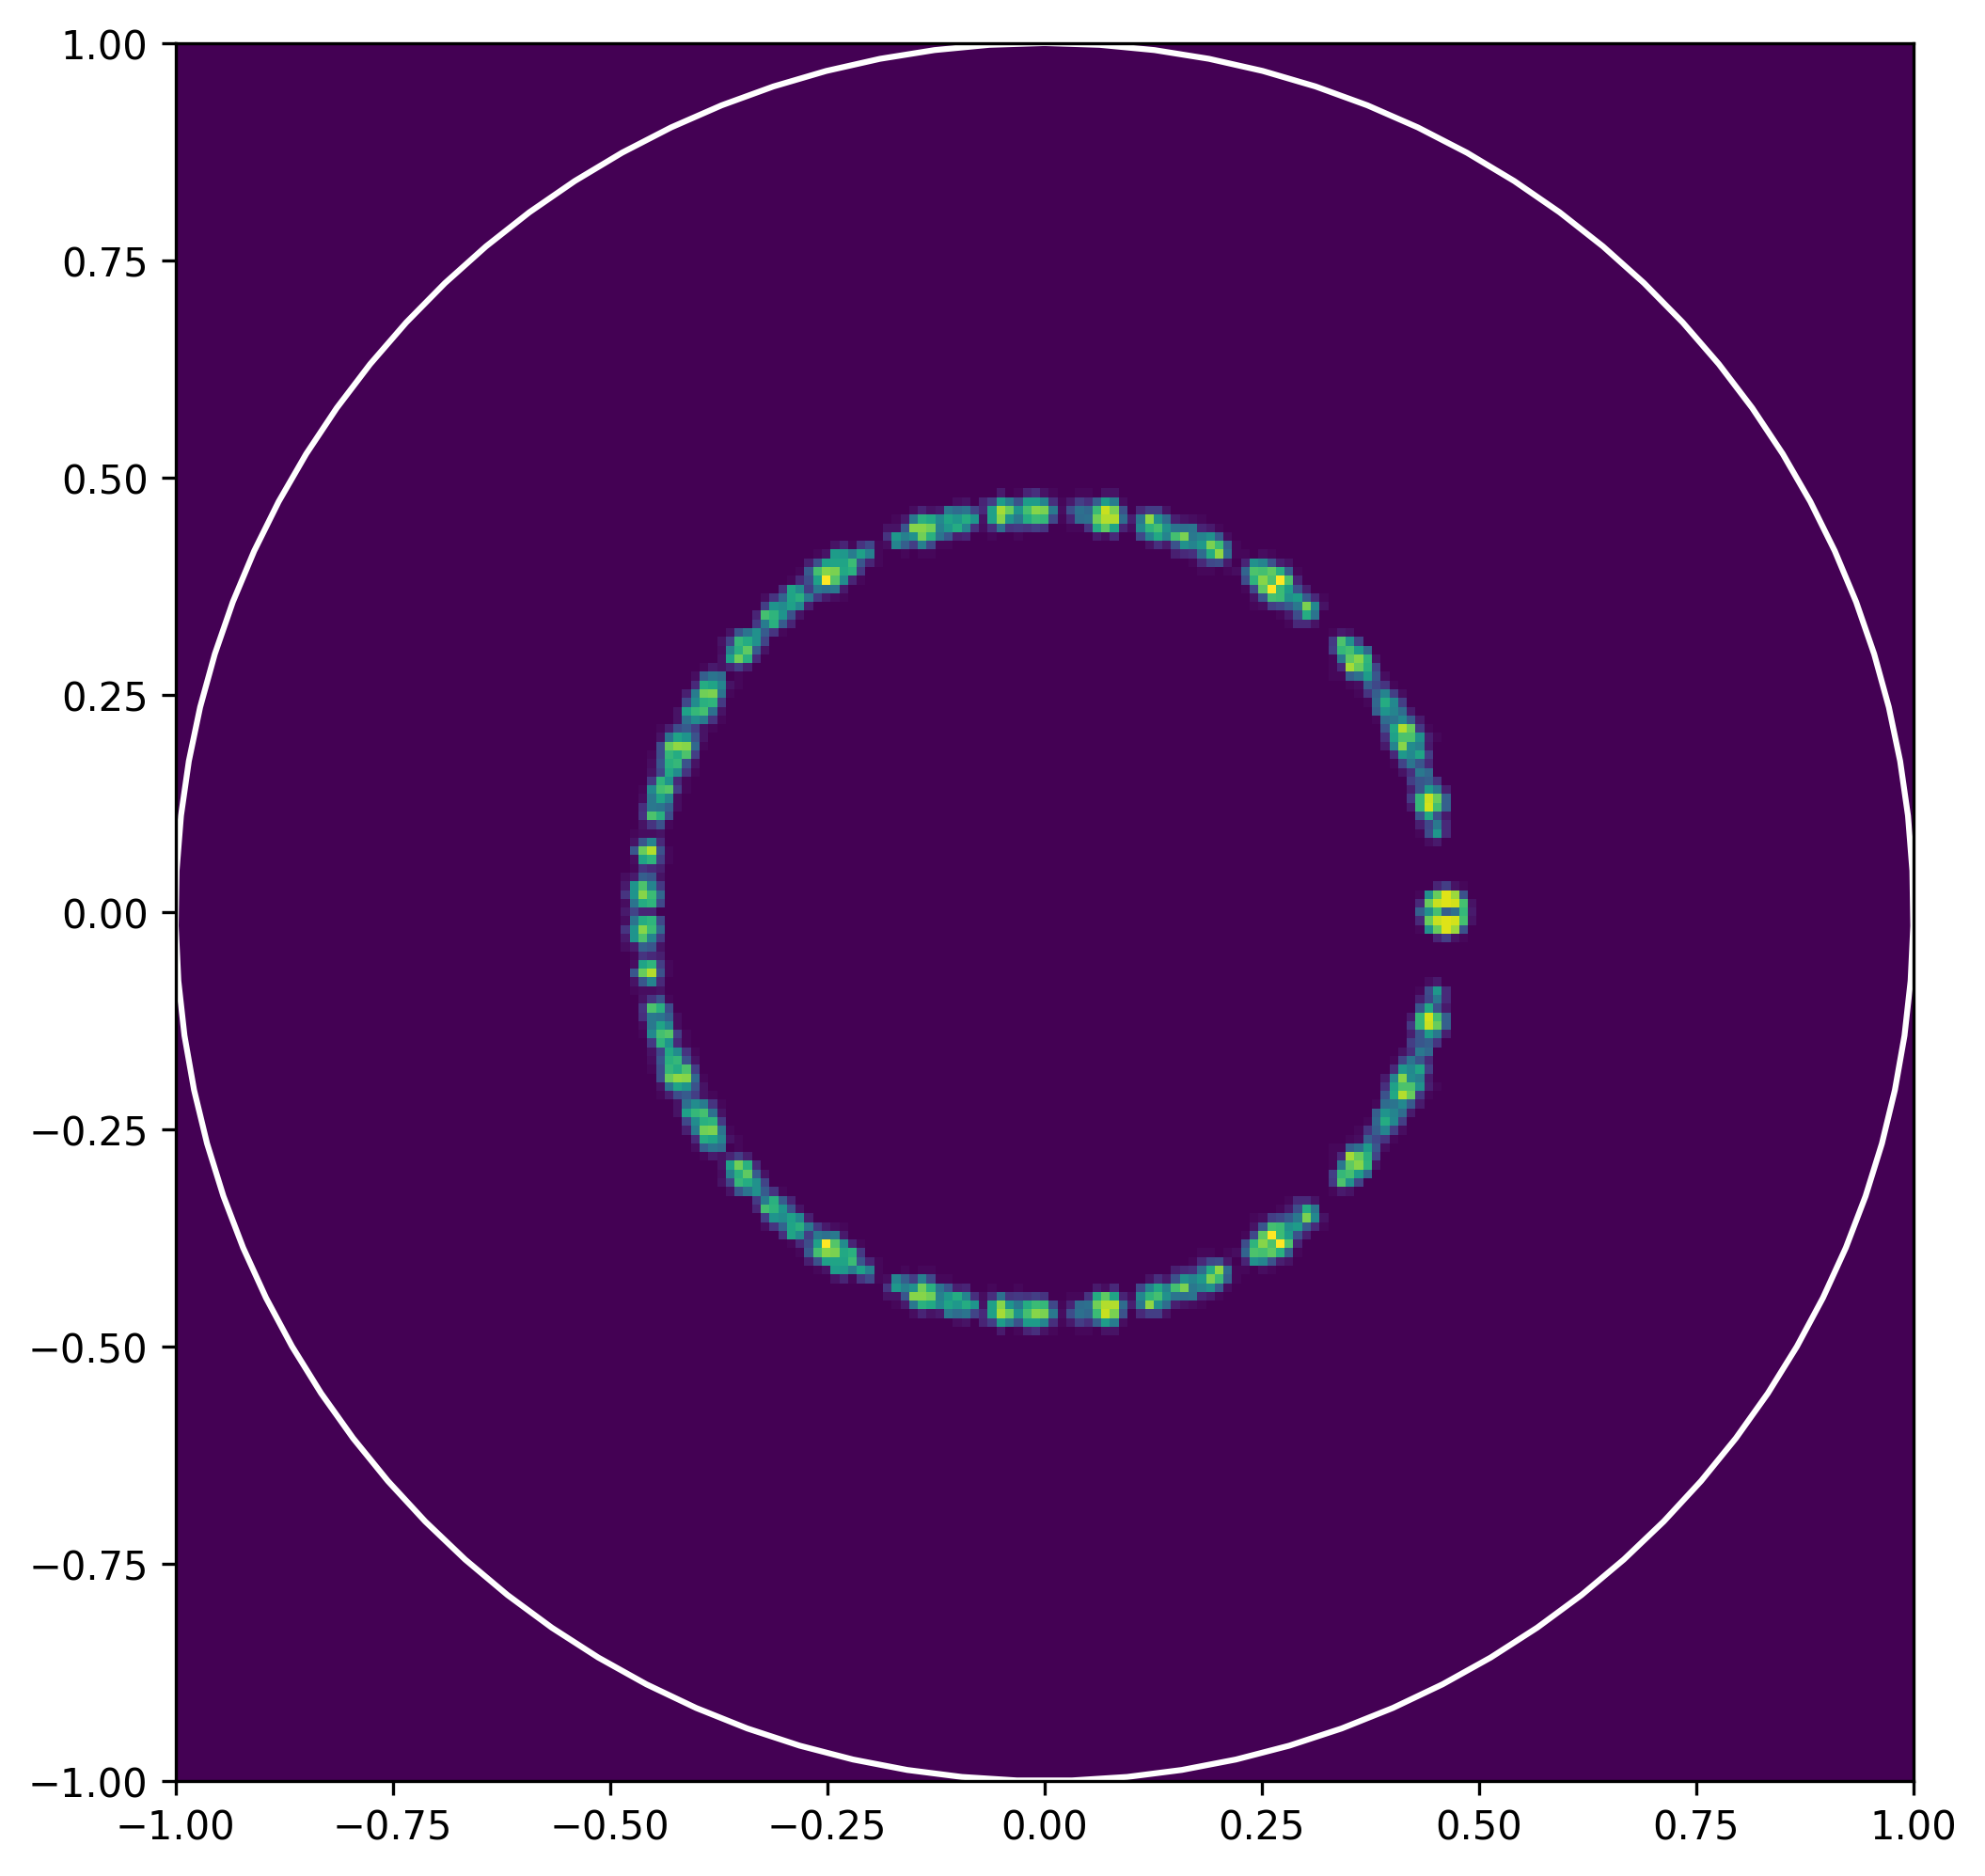

In [36]:
t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]

fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)

h, bins, _, _ = plt.hist2d(spectrum_resample[:,0], spectrum_resample[:,1], bins = np.linspace(-1, 1, 200))
plt.plot(*circle, "w")
plt.savefig("figures/nairobi_4qubit_nonintegrable_deep_diluted.pdf")

plt.show()